# Проект: Обучение с учителем: качество модели

Задача данного исследования: для интернет-магазина «В один клик» разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

Руководитель отдела уже сформировал как решать задачу:
1. Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
2. Нужно собрать данные по клиентам по следующим группам:
    - Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
    - Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
    - Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
    - Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.
3. разработать модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
4. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
5. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

Возможные сегменты покупателей:
* Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.
* Группа клиентов, которые покупают только технику, то есть товары с длинным жизненным циклом.
* Группа клиентов, которые покупают товары из категории «Товары для себя» (новая категория, которую можно выделить на основе текущих) или «Товары для детей».
* Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью.

Данные представлены в четырёх файлах:
1) в файле `market_file.csv` содержатся данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении. Данные представленны следующим набором параметров:

    - id — номер покупателя в корпоративной базе данных.
    - Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
    - Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
    - Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
    - Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
    - Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
    - Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
    - Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
    - Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
    - Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
    - Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
    - Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
    - Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.
    
2) в файле `market_money.csv` содержатся данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом. Данные представленны следующим набором параметров:

    - id — номер покупателя в корпоративной базе данных.
    - Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
    - Выручка — сумма выручки за период.
    
3) в файле `market_time.csv` содержатся данные о времени (в минутах), которое покупатель провёл на сайте в течение периода. Данные представленны следующим набором параметров:

    - id — номер покупателя в корпоративной базе данных.
    - Период — название периода, во время которого зафиксировано общее время.
    - минут — значение времени, проведённого на сайте, в минутах.
    
4) в файле `money.csv` содержатся данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю. Данные представленны следующим набором параметров:

    - id — номер покупателя в корпоративной базе данных.
    - Прибыль — значение прибыли.

**Составим краткий план исследования:**

1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
    * статистический анализ всех признаков
    * визуализация всех признаков
4. Объединение данных
5. Корреляционный анализ
6. Использование пайплайнов
7. Анализ важности признаков
8. Сегментация пользователей
9. Общий вывод

In [1]:
# установка сторонних бибилиотек
!pip install phik
!pip install shap
# обновление до последней версии
!pip install -Uq scikit-learn

In [2]:
# импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

# импорт библиотек для МО
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, HalvingGridSearchCV
from sklearn.preprocessing import (LabelEncoder, OneHotEncoder, OrdinalEncoder, 
                                   StandardScaler, MinMaxScaler, RobustScaler)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import (roc_auc_score, f1_score, accuracy_score,
                             confusion_matrix, recall_score, precision_score, precision_recall_curve)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import phik
import shap

# импорт библиотеки фильтра предупреждений
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
sklearn.__version__

'1.5.2'

## Загрузка данных

Считаем CSV-файлы с данными и сохраним их в отдельные датафреймы. Выведим первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.

In [4]:
# читаем файлы с данными
market_file = pd.read_csv('/datasets/market_file.csv', sep=',', decimal='.')
market_money = pd.read_csv('/datasets/market_money.csv', sep=',', decimal='.')
market_time = pd.read_csv('/datasets/market_time.csv', sep=',')
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

# выведем первые пять строк датафрейма и общую информацию
data = [market_file, market_money, market_time, money]
for df in data:
    display(df.head())
    df.info()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


В полученных датафреймах данные прочитаны корректно, пропущенных значений нет. Тип данных определены верно. О наличии дубликатов пока ничего сказать нельзя, изучим их на следующих шагах.

## Предобработка данных

### Наименование столбцов
Посмотрим на названия столбцов в датафреймах.

In [5]:
data = [market_file, market_money, market_time, money]
for df in data:
    display(df.columns)

Index(['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')

Index(['id', 'Период', 'Выручка'], dtype='object')

Index(['id', 'Период', 'минут'], dtype='object')

Index(['id', 'Прибыль'], dtype='object')

Столбцы имеют русские наименования. Оставим их без изменений, но приведем наименования к единому виду.

In [6]:
for df in data:
    df.columns = [i.lower().replace(' ', '_') for i in df.columns]
    display(df.columns)    

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

Index(['id', 'период', 'выручка'], dtype='object')

Index(['id', 'период', 'минут'], dtype='object')

Index(['id', 'прибыль'], dtype='object')

### Изменение типов данных
Изменить тип данных имеет смысл, чтобы сэкономить память.

In [7]:
for df in data:
    for col in df.columns:
        if 'int' in str(df[col].dtypes):
            df[col] = pd.to_numeric(df[col], downcast='integer')
        elif 'float' in str(df[col].dtypes):
            df[col] = pd.to_numeric(df[col], downcast='float')
    display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int32  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float32
 5   маркет_актив_тек_мес                 1300 non-null   int8   
 6   длительность                         1300 non-null   int16  
 7   акционные_покупки                    1300 non-null   float32
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int8   
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int8   
 11  ошибка_сервиса                

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int32  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float32
dtypes: float32(1), int32(1), object(1)
memory usage: 61.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int32 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int8  
dtypes: int32(1), int8(1), object(1)
memory usage: 33.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int32  
 1   прибыль  1300 non-null   float32
dtypes: float32(1), int32(1)
memory usage: 10.3 KB


None

### Проверка пропусков
Проверим, что пропусков в датафреймах нет.

In [8]:
for df in data:
    display(df.isna().sum())  

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64

id         0
период     0
выручка    0
dtype: int64

id        0
период    0
минут     0
dtype: int64

id         0
прибыль    0
dtype: int64

### Проверка явных дубликатов
Проверим наличие явных дубликатов в датафреймах

In [9]:
for df in data:
    print(f'Количество явных дубликатов: {df.duplicated().sum()}')

Количество явных дубликатов: 0
Количество явных дубликатов: 0
Количество явных дубликатов: 0
Количество явных дубликатов: 0


### Проверка неявных дубликатов
Изучим датафреймы на наличие неявных дубликатов

In [10]:
i = 1
for df in data:
    print(f'Категориальные столбцы в датафрейме {i}')
    cat_columns = df.select_dtypes(exclude='number').columns.tolist()
    for col in cat_columns:
        print(f'Уникальные значения в столбце: {col}')
        display(df[col].value_counts())
    i+=1

Категориальные столбцы в датафрейме 1
Уникальные значения в столбце: покупательская_активность


Прежний уровень    802
Снизилась          498
Name: покупательская_активность, dtype: int64

Уникальные значения в столбце: тип_сервиса


стандарт     914
премиум      376
стандартт     10
Name: тип_сервиса, dtype: int64

Уникальные значения в столбце: разрешить_сообщать


да     962
нет    338
Name: разрешить_сообщать, dtype: int64

Уникальные значения в столбце: популярная_категория


Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: популярная_категория, dtype: int64

Категориальные столбцы в датафрейме 2
Уникальные значения в столбце: период


предыдущий_месяц       1300
текущий_месяц          1300
препредыдущий_месяц    1300
Name: период, dtype: int64

Категориальные столбцы в датафрейме 3
Уникальные значения в столбце: период


текущий_месяц       1300
предыдцщий_месяц    1300
Name: период, dtype: int64

Категориальные столбцы в датафрейме 4


Неявные дубликаты присутствуют в датафрейме `market_file` в столбце `'тип_сервиса'`. А в датафрейме `market_time` в столбце `'период'` присутствует ошибка в значении 'предыдцщий_месяц'.

In [11]:
# удаление неявных дубликатов
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace('стандартт', 'стандарт', regex=True)
# устранение ошибки
market_time['период'] = market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц', regex=True)

### Проверка корректности количественных параметров

In [12]:
# применим метод describe
for df in data:
    display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.0,215672.75,215997.50,216322.25,216647.00
маркет_актив_6_мес,1300.0,4.253769,1.014814,0.9,3.70,4.20,4.90,6.60
маркет_актив_тек_мес,1300.0,4.011538,0.696868,3.0,4.00,4.00,4.00,5.00
длительность,1300.0,601.898462,249.856289,110.0,405.50,606.00,806.00,1079.00
акционные_покупки,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.30,0.99
средний_просмотр_категорий_за_визит,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.00,6.00
неоплаченные_продукты_штук_квартал,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.00,10.00
ошибка_сервиса,1300.0,4.185385,1.955298,0.0,3.00,4.00,6.00,9.00
страниц_за_визит,1300.0,8.176923,3.978126,1.0,5.00,8.00,11.00,20.00


,count,mean,std,min,25%,50%,75%,max
id,3900.0,215997.500000,375.325686,215348.0,215672.750000,215997.5,216322.25,216647.000000
выручка,3900.0,5025.696289,1777.704224,0.0,4590.150146,4957.5,5363.00,106862.203125


,count,mean,std,min,25%,50%,75%,max
id,2600.0,215997.500000,375.349754,215348.0,215672.75,215997.5,216322.25,216647.0
минут,2600.0,13.336154,4.080198,4.0,10.00,13.0,16.00,23.0


,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.50000,375.421985,215348.00,215672.75,215997.500,216322.25,216647.00
прибыль,1300.0,3.99663,1.013722,0.86,3.30,4.045,4.67,7.43


Значения в количественных переменных выглядят адекватными

### Выводы по разделу
Проведена предобработка данных: изменены наименования столбцов, изменены типы данных для экономии памяти, обработаны неявные дубликаты. Пропуски и явные дубликаты в датафреймах отсутствуют.

## Исследовательский анализ данных
Проведём исследовательский анализ данных для данных из каждой таблицы. Данные по клиентам можно разделить по следующим группам признаков:
- Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
- Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
- Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
- Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

Отберём клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

In [13]:
def category_plot(df, columns, colors):
    '''Функция построения графика для категориальных переменных'''
    for col in columns:
        df_col = df.pivot_table(index=col, values='id', aggfunc='count').reset_index()
        df_col.plot(y='id', kind='pie', figsize=(4.5, 4.5), 
                       labels=list(df_col[col].unique()), colors=colors,
                       autopct='%1.1f%%', wedgeprops=dict(width=0.65), legend=False, ylabel='')
        plt.title(f'Доля клиентов в зависимости от {col}', fontsize=14)
        plt.show()
        display(df_col.sort_values(by='id', ascending=False))
        
def count_plot(df, columns, colors):
    '''Функция построения графика для количественных переменных'''
    k = len(columns)
    count = 1
    for col in columns:
        plt.subplots(figsize=(15, k*5))
        # гистограмма
        plt.subplot(k, 2, count)
        df[col].hist(bins=30, color=colors[0], alpha=0.8)
        plt.xlabel(f'{col}', fontsize=13)
        plt.ylabel('Количество клиентов', fontsize=13)
        plt.title(f'Зависимость количества клиентов от {col}', fontsize=14)
        # диаграмма размаха
        plt.subplot(k, 2, count + 1)
        sns.set(style="whitegrid")
        sns.boxplot(x=df[col], color=colors[1])
        plt.title(f'Диаграмма размаха', fontsize=14)
        plt.show()
        count += 2

### Исследование целевого признака
Рассмотрим целевой признак - покупательскую активность.

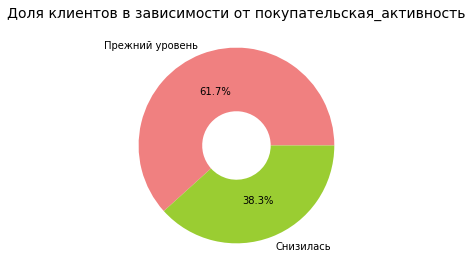

,покупательская_активность,id
0,Прежний уровень,802
1,Снизилась,498


In [14]:
# построим графики категориальных переменных
cat_columns = ['покупательская_активность']
colors = ['lightcoral','yellowgreen']
category_plot(market_file, cat_columns, colors)

**Вывод:** у примерно 60% пользователей покупательская активность осталась на прежнем уровне. И у около 40% пользователей покупательская активность снизилась.

### Исследование коммуникации сотрудников компании с клиентом
Рассмотрим такие показатели как тип сервиса, резрешения на сообщенияб маркетинг 6 мес, маркетинг текущего месяца, длительность истории с клиентом.

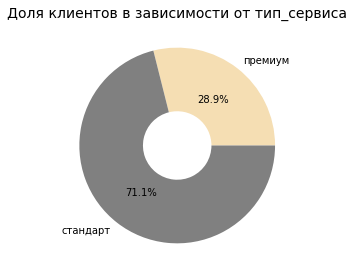

,тип_сервиса,id
1,стандарт,924
0,премиум,376


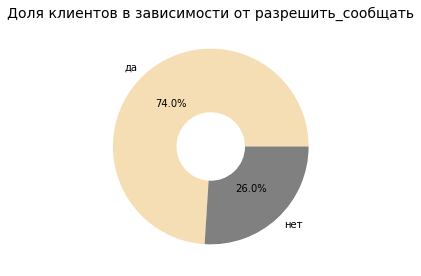

,разрешить_сообщать,id
0,да,962
1,нет,338


In [15]:
# построим графики категориальных переменных
cat_columns = ['тип_сервиса', 'разрешить_сообщать']
colors = ['wheat','gray']
category_plot(market_file, cat_columns, colors)

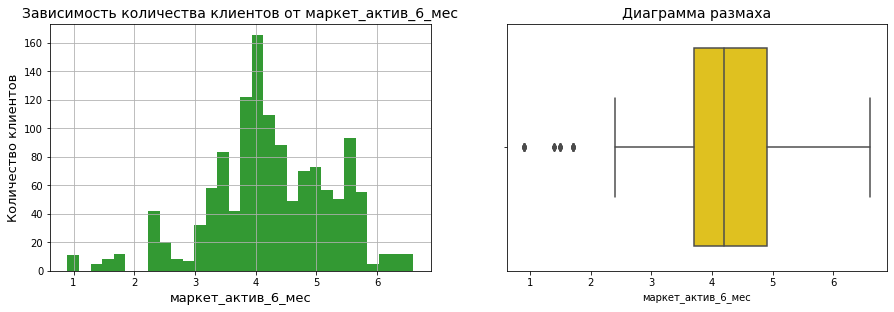

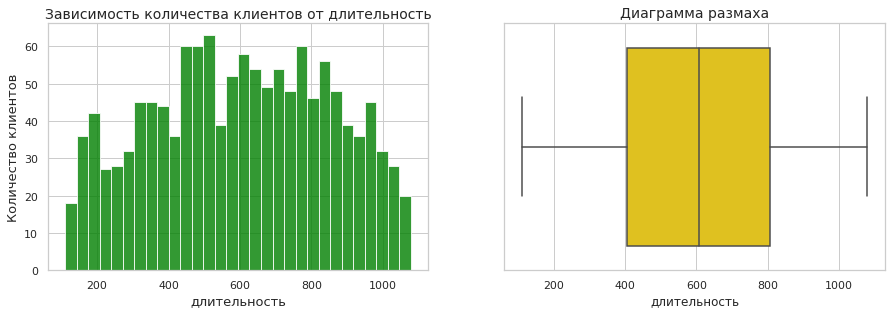

,count,mean,std,min,25%,50%,75%,max
маркет_актив_6_мес,1300.0,4.253769,1.014814,0.9,3.7,4.2,4.9,6.6
длительность,1300.0,601.898462,249.856289,110.0,405.5,606.0,806.0,1079.0


In [16]:
# построим графики количественных переменных
num_columns = ['маркет_актив_6_мес', 'длительность']
colors = ['green','gold', ]
count_plot(market_file, num_columns, colors)
market_file[num_columns].describe().T

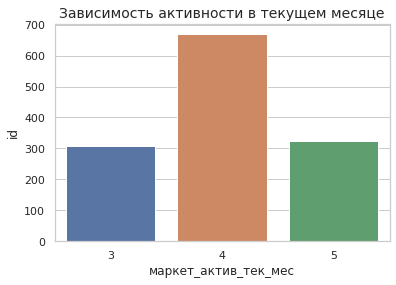

In [17]:
df_m = market_file.pivot_table(index='маркет_актив_тек_мес', values='id', aggfunc='count').reset_index()
sns.barplot(data=df_m, x='маркет_актив_тек_мес', y='id')
plt.title(f'Зависимость активности в текущем месяце', fontsize=14)
plt.show()

**Вывод:**
- 71% пользователей имеют стандартный тип сервиса. 29% пользователей имеют премиальный тип сервиса.
- 74% пользователей дают согласие на получение предложений о товарах, 26% пользователей отказываются.
- количество дней с момента регистрации составляет 600 дней. Данные не имеют выбросов.
- в среднем количество маркетинговых коммуникаций в текущем месяце, а также среднемесячное значение за последние 6 месяцев составляет 4

### Исследование продуктового поведение покупателя
Рассмотрим такие показатели как популярная категория, акционные покупки, средний просмотр категорий за визит и неоплаченные продукты кол-во штук в квартал.

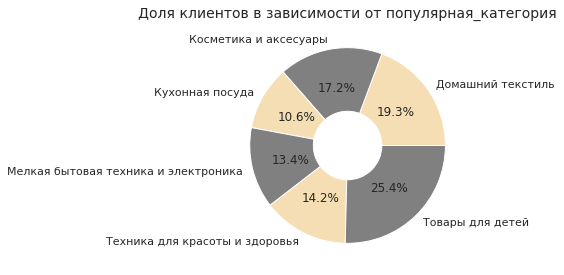

,популярная_категория,id
5,Товары для детей,330
0,Домашний текстиль,251
1,Косметика и аксесуары,223
4,Техника для красоты и здоровья,184
3,Мелкая бытовая техника и электроника,174
2,Кухонная посуда,138


In [18]:
# построим графики категориальных переменных
cat_columns = ['популярная_категория']
colors = ['wheat','gray']
category_plot(market_file, cat_columns, colors)

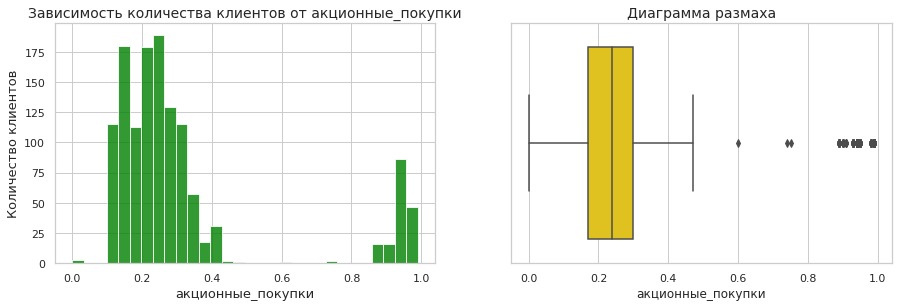

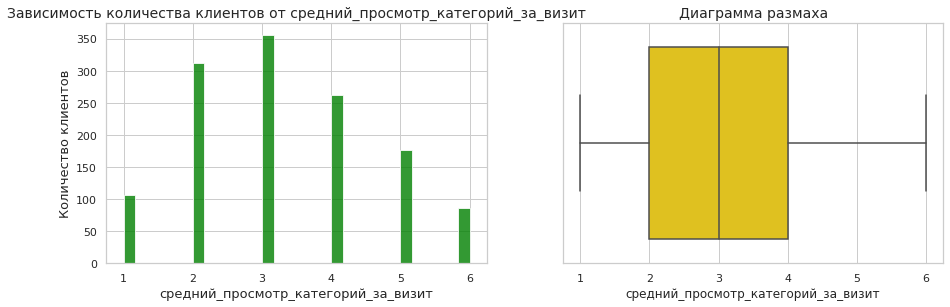

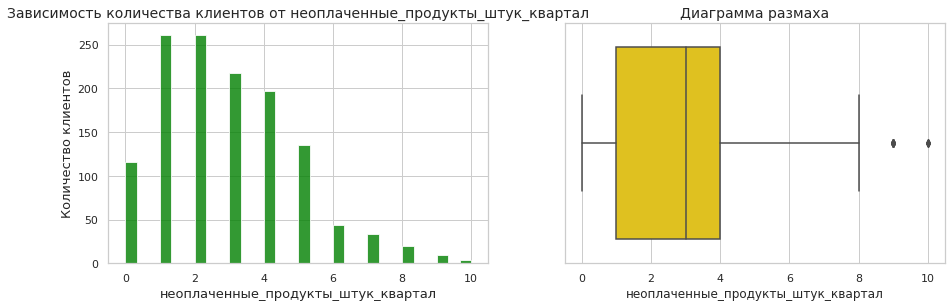

,count,mean,std,min,25%,50%,75%,max
акционные_покупки,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.3,0.99
средний_просмотр_категорий_за_визит,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.0,6.00
неоплаченные_продукты_штук_квартал,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.0,10.00


In [19]:
# построим графики количественных переменных
num_columns = ['акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал']
colors = ['green','gold']
count_plot(market_file, num_columns, colors)
market_file[num_columns].describe().T

**Вывод:**
- товары для детей составляют самую популярную категорию товаров и имеют долю 25% от общего числа товаров.
- среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев составляет 0,3. Данные имеют выбросы, что говорит о том что часть пользователей покупают в основном только акционные товары.
- покупатели в среднем просматривают 3 категории товаров.
- количество неоплаченных продуктов в корзинах покупателей за последние три месяцы в среднем составляет порядка 3х товаров.

### Исследование покупательского поведение клиента
Рассмотрит такие показатели как период, выручка и прибыль.

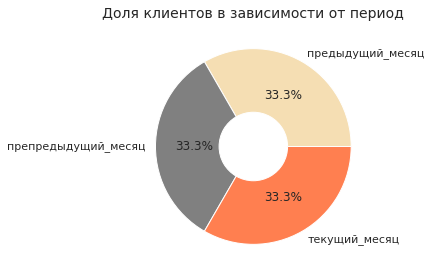

,период,id
0,предыдущий_месяц,1300
1,препредыдущий_месяц,1300
2,текущий_месяц,1300


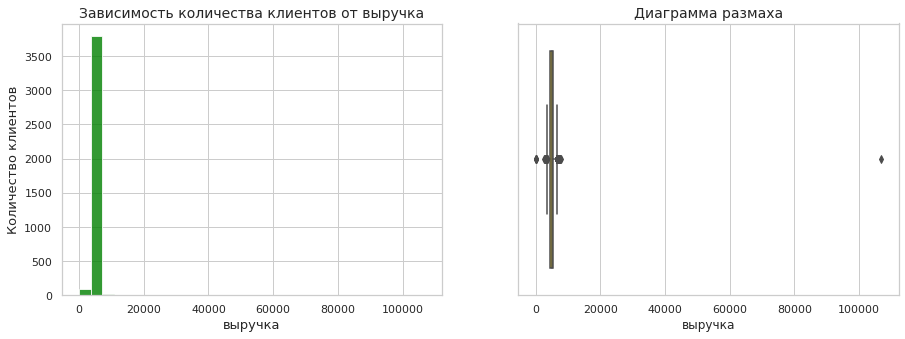

,count,mean,std,min,25%,50%,75%,max
выручка,3900.0,5025.696289,1777.704224,0.0,4590.150146,4957.5,5363.0,106862.203125


In [20]:
# построим графики категориальных переменных
cat_columns = ['период']
colors = ['wheat','gray', 'coral']
category_plot(market_money, cat_columns, colors)
# построим графики количественных переменных
num_columns = ['выручка']
colors = ['green','gold']
count_plot(market_money, num_columns, colors)
market_money[num_columns].describe().T

Выброс удалим

In [21]:
# сохраним id пользователей как с очень большой выручкой, так и выручкой равной 0.
drop_id = market_money.query('выручка > 10000 or выручка < 100')['id'].tolist()
drop_id

[215348, 215348, 215357, 215357, 215359, 215359, 215380]

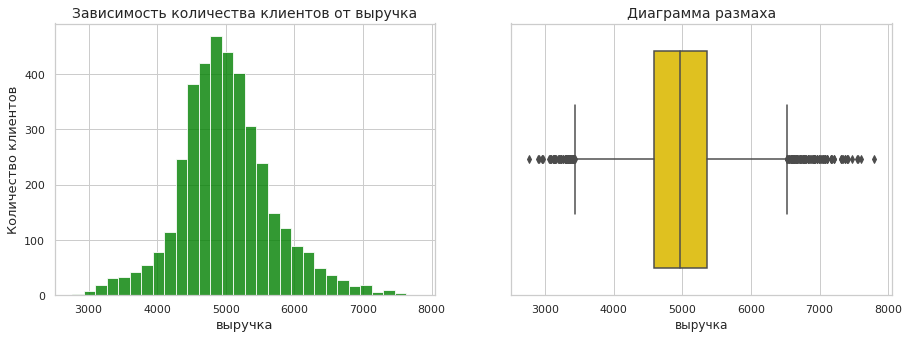

,count,mean,std,min,25%,50%,75%,max
выручка,3893.0,5007.282715,679.724915,2758.699951,4592.0,4959.0,5363.0,7799.399902


In [22]:
# удалим пользователей, у которых отсутствует выручка хотяб в одном месяце или выброс с очень большой выручкой
market_money = market_money.query('выручка < 10000 and выручка > 100')
count_plot(market_money, num_columns, colors)
market_money[num_columns].describe().T

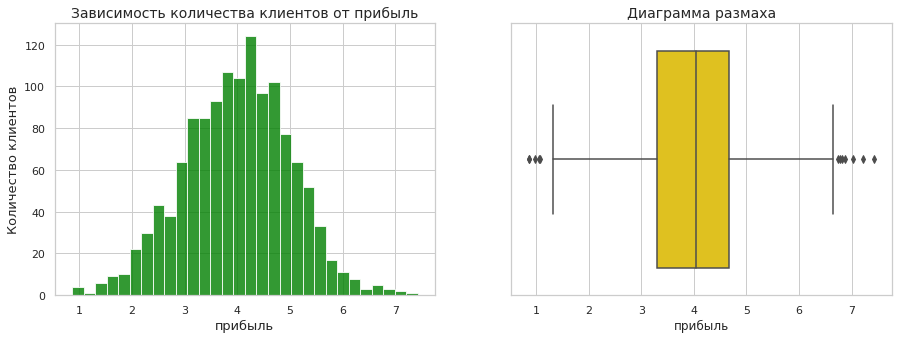

,count,mean,std,min,25%,50%,75%,max
прибыль,1300.0,3.99663,1.013722,0.86,3.3,4.045,4.67,7.43


In [23]:
# построим графики количественных переменных
num_columns = ['прибыль']
colors = ['green','gold']
count_plot(money, num_columns, colors)
money[num_columns].describe().T

**Вывод:**
- данные представлены для всех трех периодов, когда зафиксирована выручка: за текущий, предыдущий и препредыдущий месяц, в равном количестве. Что вызывает сомнения в достоверности.
- данные выручки имели выброс в сторону неправдоподобно большого значения. После его удаления данные имеют нормальное распределение.
- данные прибыли также имеют нормальное распределение.

### Исследование поведение покупателя на сайте
Рассмотрим такике показатели как ошибка сервиса, кол-во страниц за визит, период и общее кол-во минут, проведенных на сайте.

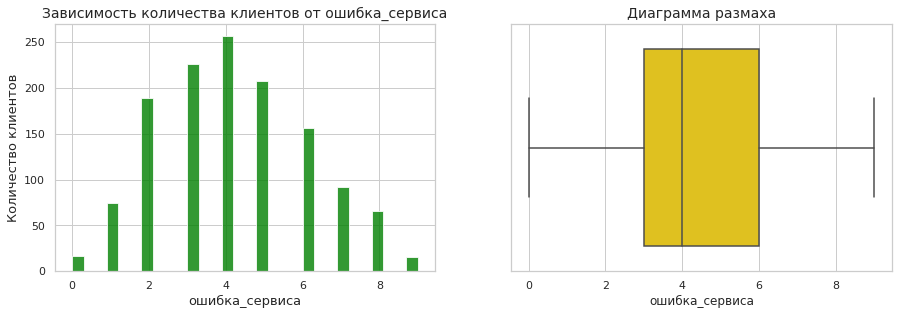

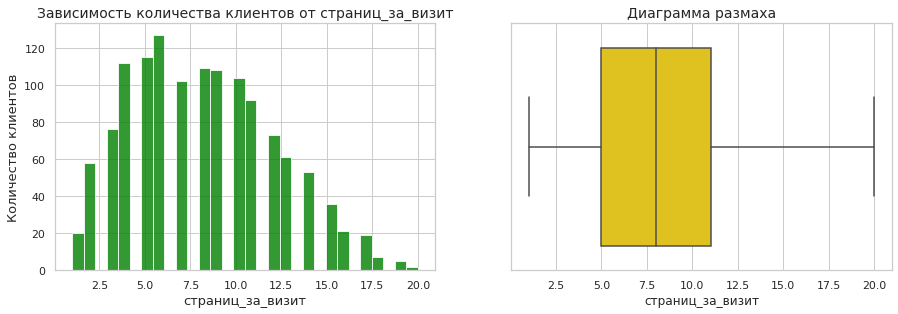

,count,mean,std,min,25%,50%,75%,max
ошибка_сервиса,1300.0,4.185385,1.955298,0.0,3.0,4.0,6.0,9.0
страниц_за_визит,1300.0,8.176923,3.978126,1.0,5.0,8.0,11.0,20.0


In [24]:
# построим графики количественных переменных
num_columns = ['ошибка_сервиса', 'страниц_за_визит']
colors = ['green','gold']
count_plot(market_file, num_columns, colors)
market_file[num_columns].describe().T

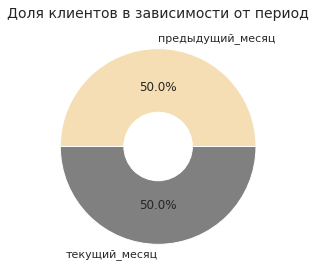

,период,id
0,предыдущий_месяц,1300
1,текущий_месяц,1300


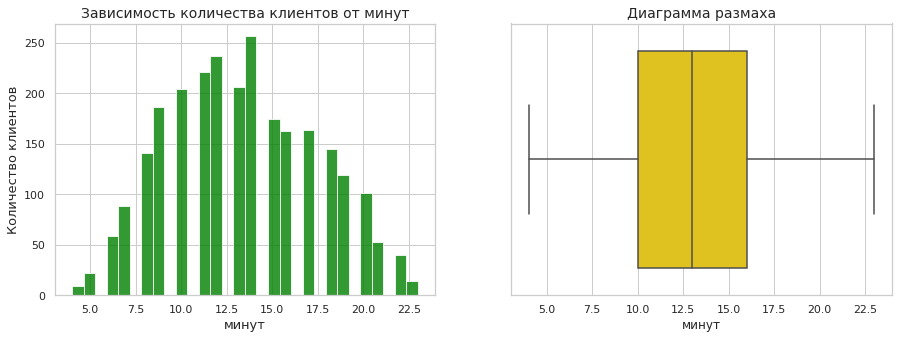

,count,mean,std,min,25%,50%,75%,max
минут,2600.0,13.336154,4.080198,4.0,10.0,13.0,16.0,23.0


In [25]:
# построим графики категориальных переменных
cat_columns = ['период']
colors = ['wheat','gray', 'coral']
category_plot(market_time, cat_columns, colors)
# построим графики количественных переменных
num_columns = ['минут']
colors = ['green','gold']
count_plot(market_time, num_columns, colors)
market_time[num_columns].describe().T

**Вывод:**
- среднее число сбоев, которые касаются пользователя при посещении сайта, составляют 4. данные не содержат выбросов.
- среднее число просмотренных страниц пользователем за визит составляет 8 страниц.
- данные представлены за текущий и предыдущий месяц
- в среднем время проведенное на сайте составляет 13 минут, данные не имеют выбросов.

In [26]:
# удалим пользователей из всех датафреймов, которые по результатам исследования не подходят
data = [market_file, market_money, market_time, money]
for df in data:
    df = df.query('id not in @drop_id')

### Выводы по разделу
- покупательская активность пользователей распределяется на оставшуюся на прежнем уровне и снизившуюся в соотношении 60% и 40% соответственно.  
- большая часть пользователей имеют стандартный тип сервиса (71%) и пользователей имеющих премиальный тип сервиса меньше (29%).
- 74% пользователей дают согласие на получение предложений о товарах, 26% пользователей отказываются.
- количество дней с момента регистрации составляет 600 дней.
- в среднем количество маркетинговых коммуникаций в текущем месяце, а также среднемесячное значение за последние 6 месяцев составляет 4
- товары для детей составляют самую популярную категорию товаров и имеют долю 25% от общего числа товаров.
- среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев составляет 0,3.
- покупатели в среднем просматривают 3 категории товаров.
- количество неоплаченных продуктов в корзинах покупателей за последние три месяцы в среднем составляет порядка 3х товаров.
- данные представлены для всех трех периодов, когда зафиксирована выручка: за текущий, предыдущий и препредыдущий месяц, в равном количестве. Что вызывает сомнения в достоверности.
- данные прибыли имеют нормальное распределение.

## Объединение таблиц
Объединим таблицы market_file.csv, market_money.csv, market_time.csv. Так как данные о выручке и времени на сайте находятся в одном столбце для всех периодов, то сделаем отдельные столбцы для каждого периода.

In [27]:
market_time_corr = market_time.pivot_table(index='id', columns='период').reset_index()
market_time_corr.columns = ['id', 'пред_месяц_мин', 'тек_месяц_мин']
market_time_corr.head()

,id,пред_месяц_мин,тек_месяц_мин
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11


In [28]:
market_time_corr.isna().sum()

id                0
пред_месяц_мин    0
тек_месяц_мин     0
dtype: int64

In [29]:
market_money_corr = market_money.pivot_table(index='id', columns='период').reset_index()
market_money_corr.columns = ['id', 'пред_месяц_выручка', 'препред_месяц_выручка', 'тек_месяц_выручка']
market_money_corr.head()

,id,пред_месяц_выручка,препред_месяц_выручка,тек_месяц_выручка
0,215348,NaN,NaN,3293.100098
1,215349,5216.0,4472.0,4971.600098
2,215350,5457.5,4826.0,5058.399902
3,215351,6158.0,4793.0,6610.399902
4,215352,5807.5,4594.0,5872.500000


In [30]:
market_money_corr.isna().sum()

id                       0
пред_месяц_выручка       3
препред_месяц_выручка    3
тек_месяц_выручка        1
dtype: int64

In [31]:
market_money_corr = market_money_corr.dropna()

Теперь объединим датасеты.

In [32]:
data_all = market_file.merge(market_time_corr, on='id', how='outer').merge(market_money_corr, on='id', how='right')
data_all

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,пред_месяц_мин,тек_месяц_мин,пред_месяц_выручка,препред_месяц_выручка,тек_месяц_выручка
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,12,10,5216.0,4472.0,4971.600098
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,8,13,5457.5,4826.0,5058.399902
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,11,13,6158.0,4793.0,6610.399902
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,8,11,5807.5,4594.0,5872.500000
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,10,10,4738.5,5124.0,5388.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,14,7,3664.0,4704.0,4741.700195
1292,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,12,11,4729.0,5299.0,5353.000000
1293,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,12,18,5160.0,5334.0,5139.200195
1294,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,18,7,4923.0,4725.0,5224.600098


**Вывод:** таблицы объединены.

## Шаг 5. Корреляционный анализ
Проведём корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования.

In [33]:
# удалим столбец с id из датафрейма и сохраним его в отдельную переменную
id_col = data_all['id']
data_all = data_all.drop('id', axis=1)

### Проверка на мультиколлинеарность для количественных признаков

Если две или более независимых переменных сильно коррелируют друг с другом (0,9-0,95), то можно говорить о мультиколлинеарности, что может вызвать проблемы при интерпретации модели.
Для обнаружения мультиколлинеарности воспользуемся коэффициентом инфляции дисперсии (VIF), который измеряет корреляцию и силу корреляции между независимыми переменными.

In [34]:
df = data_all[data_all.select_dtypes(include='number').columns.tolist()]
X_vif = add_constant(df)
vif = pd.DataFrame()
vif['параметр'] = X_vif.columns
vif['VIF'] = [round(variance_inflation_factor(X_vif.values, i), 3) for i in range(X_vif.shape[1])]
vif

,параметр,VIF
0,const,352.524
1,маркет_актив_6_мес,1.221
2,маркет_актив_тек_мес,1.045
3,длительность,1.099
4,акционные_покупки,1.186
5,средний_просмотр_категорий_за_визит,1.179
6,неоплаченные_продукты_штук_квартал,1.199
7,ошибка_сервиса,1.079
8,страниц_за_визит,1.418
9,пред_месяц_мин,1.527


Из таблицы с коэффициентами инфляции дисперсии видно, что все значения ниже 5 и указывают на умеренную корреляцию между параметрами. Поэтому можно сделать вывод, что мультиколлинеарность не является проблемой.

### Коэффициенты корреляции и матрица корреляции
Построим матрицу корреляции коэффициентов Фи для всех признаков.

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'пред_месяц_мин', 'тек_месяц_мин', 'пред_месяц_выручка', 'препред_месяц_выручка', 'тек_месяц_выручка']


,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,пред_месяц_мин,тек_месяц_мин,пред_месяц_выручка,препред_месяц_выручка,тек_месяц_выручка
покупательская_активность,1.000000,0.129940,0.000000,0.544831,0.000000,0.099901,0.506276,0.299717,0.539607,0.505655,0.224154,0.749888,0.685138,0.576770,0.224638,0.497393,0.197213
тип_сервиса,0.129940,1.000000,0.289965,0.089911,0.045258,0.401411,0.030010,0.070809,0.185391,0.120027,0.079515,0.102594,0.131814,0.000000,0.000000,0.069704,0.124216
разрешить_сообщать,0.000000,0.289965,1.000000,0.000000,0.052618,0.253831,0.012198,0.073684,0.070359,0.195982,0.021839,0.042134,0.038387,0.000000,0.080842,0.000000,0.060907
маркет_актив_6_мес,0.544831,0.089911,0.000000,1.000000,0.079854,0.000000,0.279553,0.150386,0.206788,0.289421,0.142401,0.396769,0.363950,0.330601,0.155476,0.315331,0.039795
маркет_актив_тек_мес,0.000000,0.045258,0.052618,0.079854,1.000000,0.174233,0.000000,0.136243,0.246633,0.144203,0.116946,0.000000,0.107945,0.061410,0.051824,0.000000,0.000000
длительность,0.099901,0.401411,0.253831,0.000000,0.174233,1.000000,0.000000,0.000000,0.186795,0.192611,0.175608,0.122495,0.026448,0.101481,0.125572,0.113200,0.147048
акционные_покупки,0.506276,0.030010,0.012198,0.279553,0.000000,0.000000,1.000000,0.122385,0.199180,0.237962,0.000000,0.311418,0.262324,0.250558,0.060733,0.226381,0.071094
популярная_категория,0.299717,0.070809,0.073684,0.150386,0.136243,0.000000,0.122385,1.000000,0.226116,0.248620,0.000000,0.160300,0.195233,0.089883,0.252097,0.043528,0.237240
средний_просмотр_категорий_за_визит,0.539607,0.185391,0.070359,0.206788,0.246633,0.186795,0.199180,0.226116,1.000000,0.325578,0.070315,0.262271,0.159837,0.182568,0.098440,0.176828,0.092597
неоплаченные_продукты_штук_квартал,0.505655,0.120027,0.195982,0.289421,0.144203,0.192611,0.237962,0.248620,0.325578,1.000000,0.032907,0.363760,0.256632,0.232383,0.249171,0.261016,0.230022


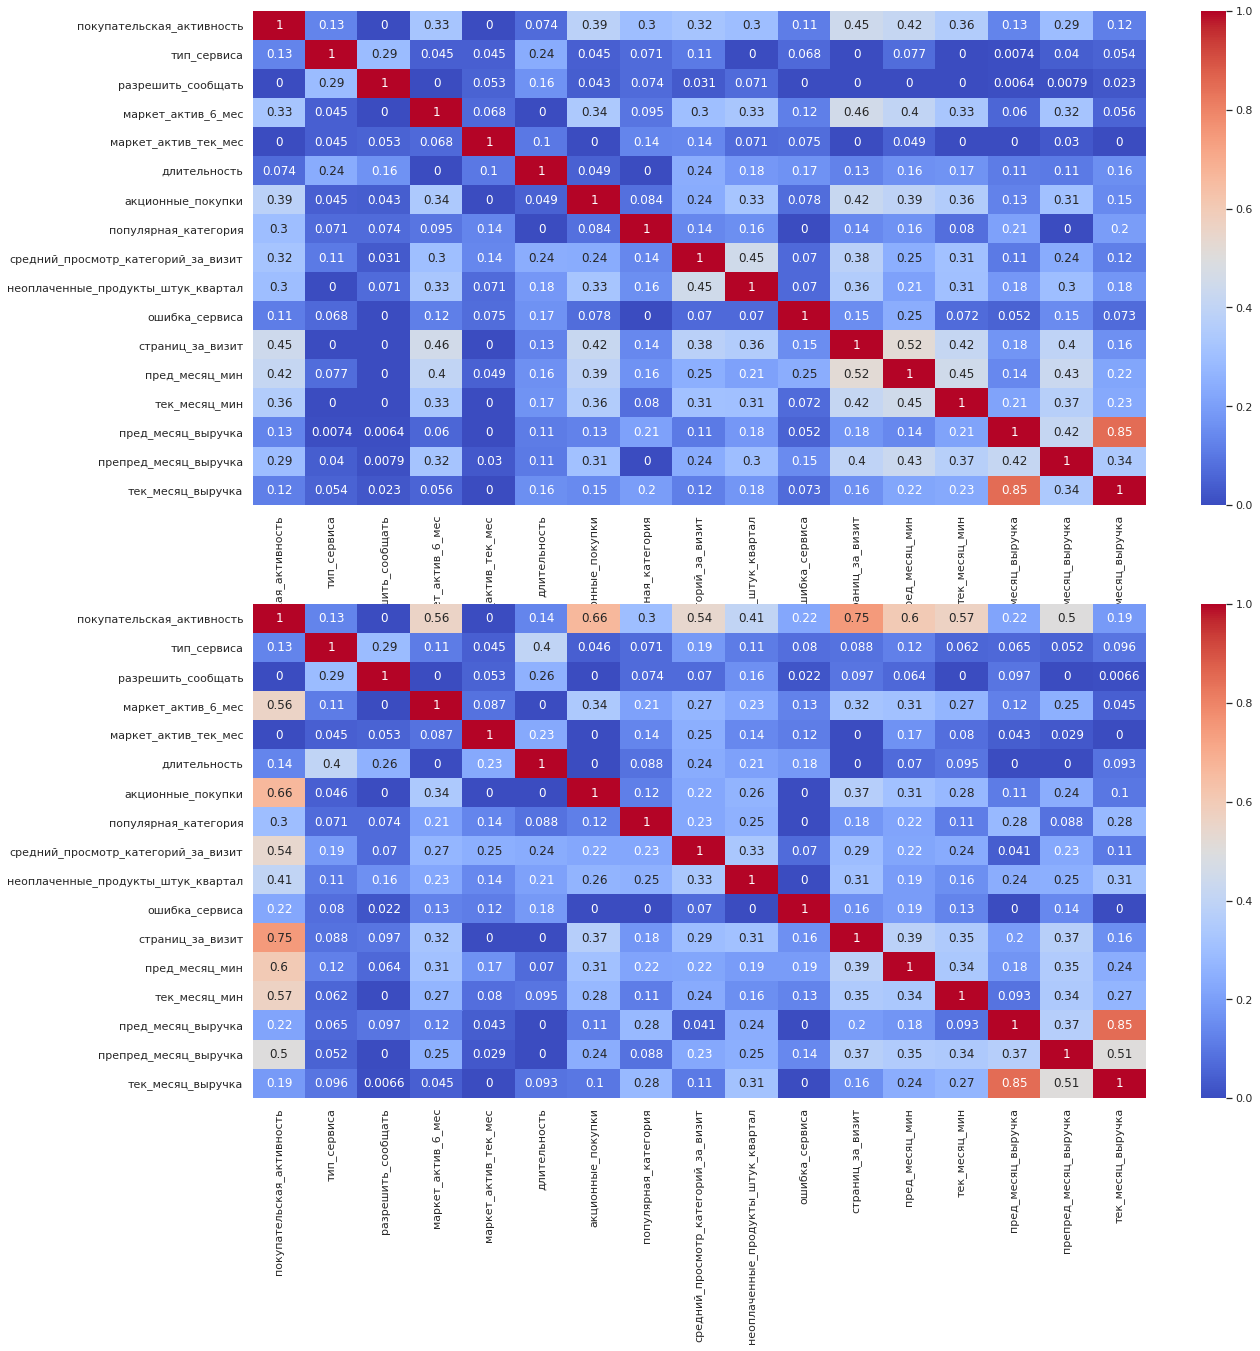

In [35]:
num_columns = data_all.select_dtypes(include='number').columns.tolist()
# коэффициенты корреляции Фи
display(data_all.phik_matrix())
plt.subplots(figsize=(20, 20))
plt.subplot(2, 1, 1)
sns.heatmap(data_all.phik_matrix(interval_cols=[col for col in num_columns], bins=5), annot=True, cmap='coolwarm');
plt.subplot(2, 1, 2)
sns.heatmap(data_all.phik_matrix(interval_cols=[col for col in num_columns], bins=20), annot=True, cmap='coolwarm');
plt.show()

При разной разбивке для количественных параметров видно сильное изменение коэффициентов Фи, что может говорить о нелинейной связи между параметрами.

Целевой признак - покупательская активность. Посмотрим на зависимость признаков при разной покупательской активности пользователей.

In [36]:
# коэффициенты корреляции Фи для разной покупательской активности
df1 = data_all.query('покупательская_активность == "Снизилась"')
df1 = df1.drop('покупательская_активность', axis=1)
df2 = data_all.query('покупательская_активность == "Прежний уровень"')
df2 = df2.drop('покупательская_активность', axis=1)

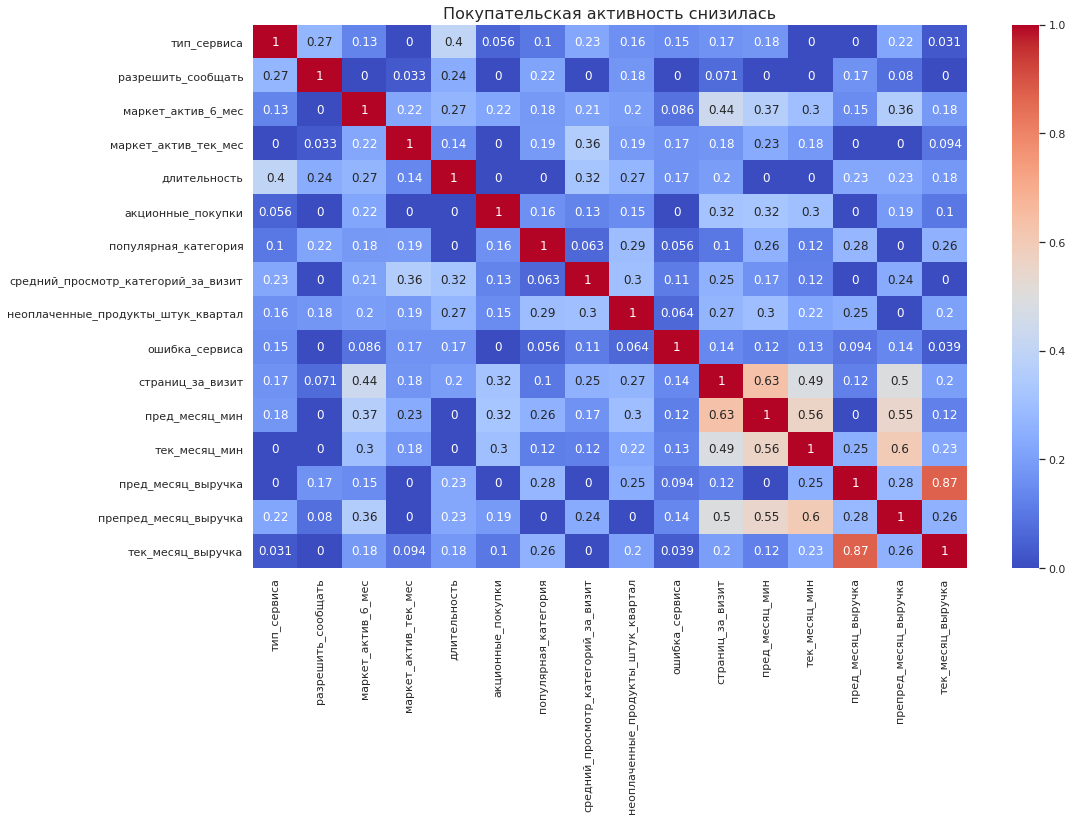

In [37]:
# матрица корреляции пользователей, у которых покупательская активность снизилась
plt.subplots(figsize=(16, 10))
sns.heatmap(df1.phik_matrix(interval_cols=[col for col in num_columns]), annot=True, cmap='coolwarm');
plt.title(f'Покупательская активность снизилась', fontsize=16)
plt.show()

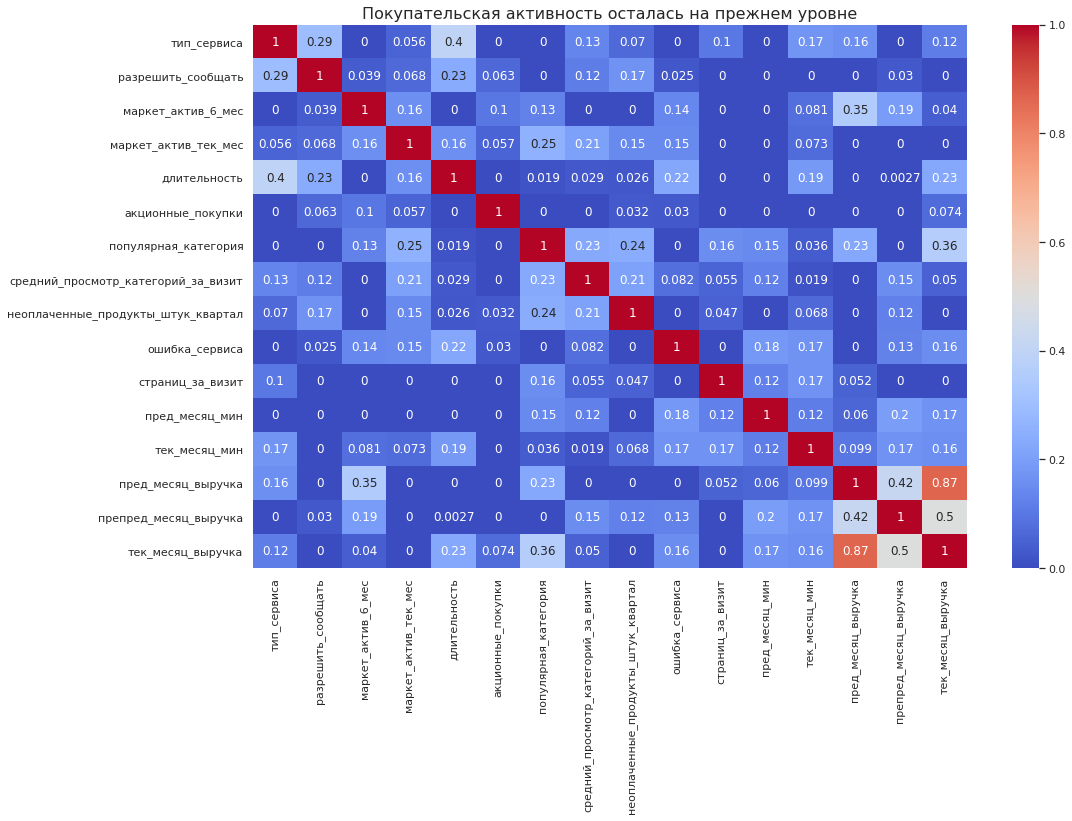

In [38]:
# матрица корреляции пользователей, у которых покупательская активность осталась на прежнем уровне
plt.subplots(figsize=(16, 10))
sns.heatmap(df2.phik_matrix(interval_cols=[col for col in num_columns]), annot=True, cmap='coolwarm');
plt.title(f'Покупательская активность осталась на прежнем уровне', fontsize=16)
plt.show()

Для пользователей, у которых покупательская активность снизилась характерна корреляция акционных прокупок и выручки в препредыдущем месяце. Для покупателей, у которых покупательская активность осталась на прежнем уровне характерна корреляция выручки в текущем месяце и выручки а предыдущем месяце.

### Исследование характеристик в зависимости от пользовательской активности

In [39]:
def cat_plot_category(data, cat_col):
    '''Функция построения графика для категориальных переменных с вариативностью категориального признака'''
    cat_columns = data.select_dtypes(exclude='number').columns.tolist()[1:]
    k = len(cat_columns)
    count = 1
    for col in cat_columns:
        plt.subplots(figsize=(10, k*4))
        plt.subplot(k, 1, count)
        df = data.pivot_table(index=[col, cat_col], values='длительность', aggfunc='count').reset_index()
        sns.barplot(data=df, y=col, x='длительность', hue=cat_col, palette='Pastel1')
        plt.ylabel(f'{col}', fontsize=13)
        plt.xlabel('Количество пользователей', fontsize=13)
        plt.title(f'Зависимость {col} от количества пользователей', fontsize=14)
        plt.show()
        count += 1
        
def num_plot_category(data, cat_col):
    '''Функция построения гистограммы для количественных переменных с вариативностью категориального признака'''
    num_columns = data.select_dtypes(include='number').columns.tolist()
    k = len(num_columns)
    count = 1
    for col in num_columns:
        plt.subplots(figsize=(10, k*4))
        plt.subplot(k, 1, count)
        sns.histplot(x=col, hue=cat_col, data = data, bins = 30);
        plt.xlabel(f'{col}', fontsize=13)
        plt.ylabel('Количество пользователей', fontsize=13)
        plt.title(f'Зависимость {col} от количества пользователей', fontsize=14)
        plt.show()
        count += 1

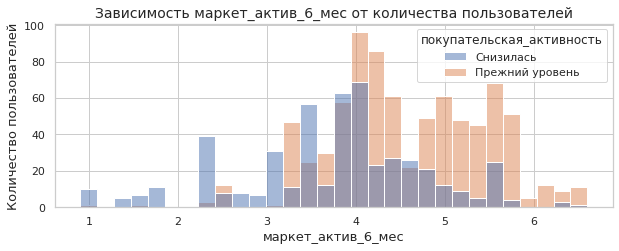

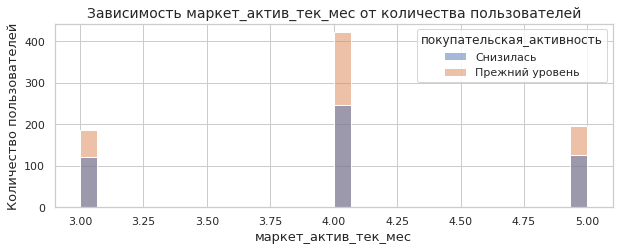

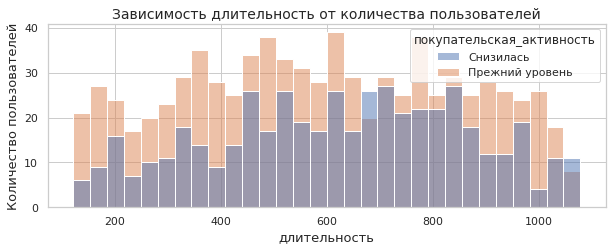

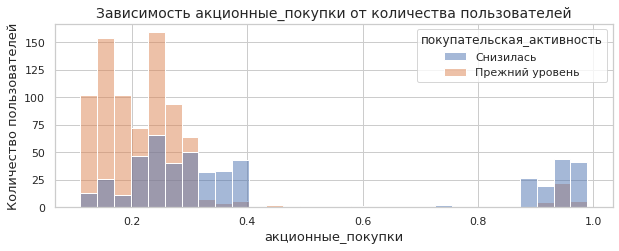

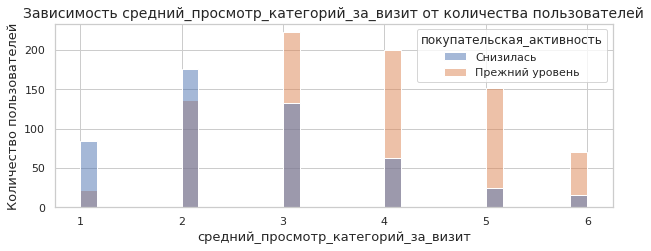

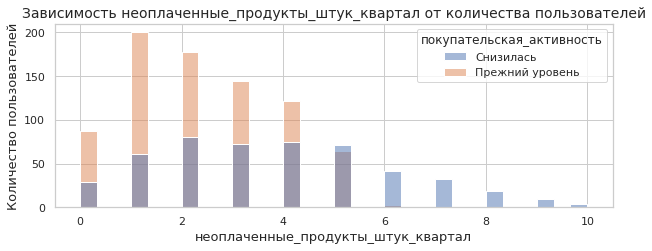

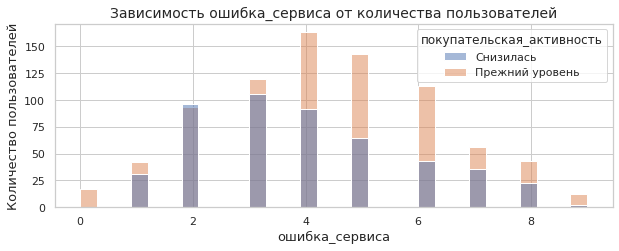

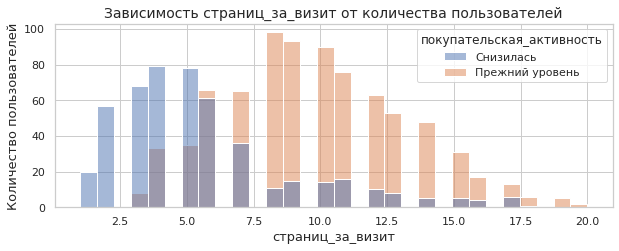

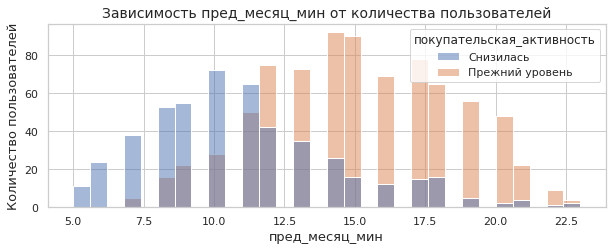

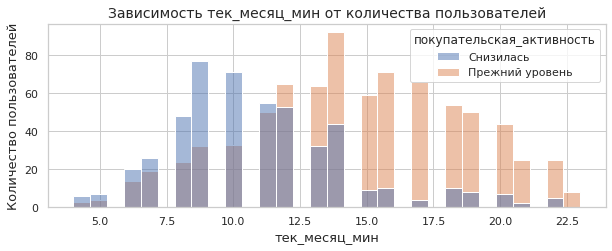

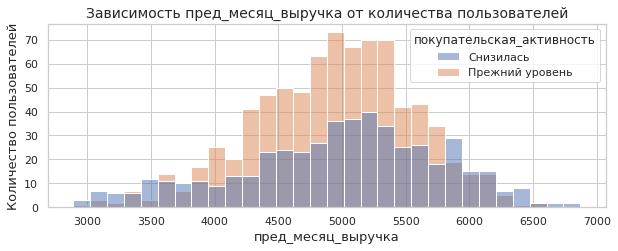

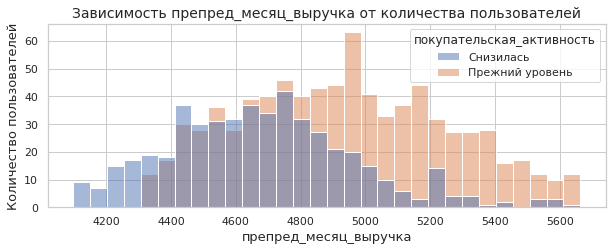

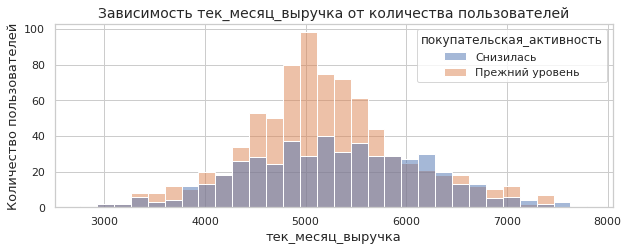

In [40]:
num_plot_category(data_all, 'покупательская_активность')

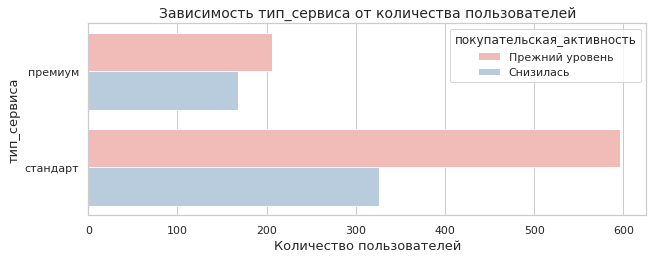

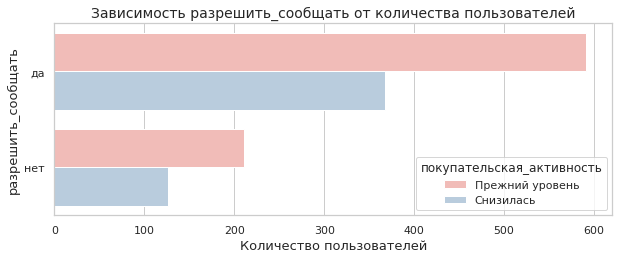

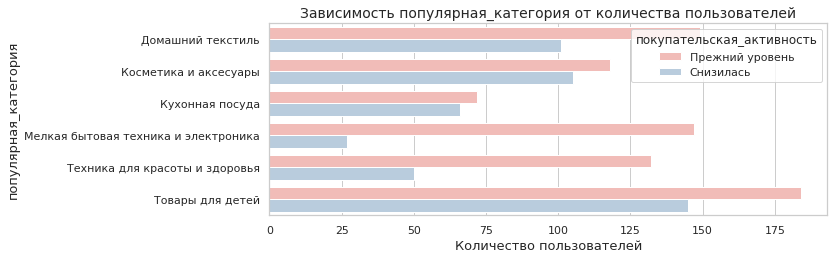

In [41]:
cat_plot_category(data_all, 'покупательская_активность')

**Выводы:** 
- у пользователей с покупательской активностью оставшейся на прежнем уровне значения среднемесячных маркетинговых коммуникаций компании приходящиеся на покупателя выше чем у тех пользователей, у кого покупательская активность снизилась.
- у пользователей с покупательской активностью оставшейся на прежнем уровне доля акционных покупок меньше чем у пользователей, у которых покупательская активность снизилась.
- пользователей с покупательской активностью оставшейся на прежнем уровне просматривают больше категорий товаров за визит, чем пользователи, у которых покупательская активность снизилась.
- у пользователей, у которых покупательская активность снизилась, больше оставшихся неоплаченных товаров в корзине, чем у пользователей с покупательской активностью оставшейся на прежнем уровне значения.
- пользователи, у которых покупательская активность снизилась, посещают меньше страниц за визит как и меньше проводят времени на сайте, чем пользователи с покупательской активностью оставшейся на прежнем уровне значения.
- у пользователей со стандартным типом сервиса соотношение пользователей с покупательской активностью оставшейся на прежнем уровне значений и пользователей, у которых покупательская активность снизилась, составляет 2 к 1, в то время как у пользователей премиального сервиса это соотношение примерно 1 к 1.
- среди разрешает сообщать рекламную информацию и не разришает, одинаковое соотношение пользователей у которых покупательская активность осталась на преднем уровне и тех у кого она снизилась.
- больше всего пользователей у кого покупательская активность снизилась покупали товаря для детей, а также косметику и домашний текстиль.

## Использование пайплайнов в обучении моделей МО
Обучим изученные модели МО - логистическую регрессию, метод опорных векторов, метод k-ближайших соседей, дерево решений. Для этого используем пайплайны.

### Подготовка данных
Используем ColumnTransformer. Количественные и категориальные признаки обработаем в пайплайне раздельно. Для кодирования категориальных признаков используем минимум два кодировщика, для масштабирования количественных — минимум два скейлера.

Так как у нас задача классификации, предсказание пользовательской активности и разработка предложения для клиентов, чья активность снижается, то используем кодировщик для целевого признака.

In [42]:
# разделим данные на входные и целевой признак
X = data_all.drop(['покупательская_активность'], axis=1)
y = data_all['покупательская_активность']

RANDOM_STATE = 42
TEST_SIZE = 0.25

# делим данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y)

# закодируем целевой признак
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# разделим столбцы
ohe_columns = ['разрешить_сообщать', 'популярная_категория']
ord_columns = ['тип_сервиса']
num_columns = data_all.select_dtypes(include='number').columns.tolist()

In [43]:
# Пайплайны для подготовки данных
ohe_pipe = Pipeline([
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='error'))
    ])
data_preprocessor = ColumnTransformer([
        ('ohe', ohe_pipe, ohe_columns),       
        ('ord', OrdinalEncoder(), ord_columns),
        ('num', StandardScaler(), num_columns)
    ], remainder='passthrough')

# пайплайн по подготовке данных и моделью МО
pipe_final = Pipeline([
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ])

### Выбор модели МО и гиперпараметры
Обучим четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC(). Для каждой из них подберём гиперпараметры и метрики. Используем метрику roc_auc, так как она оценивает работу модели в обобщенно, вне зависимости от порога классификации. Позволяет сравнивать модели с разными настройками, а также устойчива к несбалансированномым данным, что у нас и наблюдается в целевом признаке.

In [44]:
# создадим словарь гиперпараметров, чтобы для каждой модели учесть свои
param_distributions = [
    # словарь для модели LogisticRegression()
    {'models': [LogisticRegression(random_state=RANDOM_STATE)],
     'models__C': range(1, 7),
     'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']},
    # словарь для модели SVC()
    {'models': [SVC(probability=True, random_state=RANDOM_STATE)],
     'models__kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
     'models__C': range(1, 7),
     'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']},
    # словарь для модели KNeighborsClassifier() 
    {'models': [KNeighborsClassifier()],
     'models__n_neighbors': range(3, 100),
     'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]},
    # словарь для модели DecisionTreeClassifier()
    {'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
     'models__max_depth': range(2, 7),
     'models__min_samples_split': range(2, 7),
     'models__min_samples_leaf': range(1, 5),
     'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']}
]

In [45]:
# выбор лучшей комбинации модели и гиперпараметров
rs1 = RandomizedSearchCV(
    pipe_final, 
    param_distributions, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
# поиск гиперпараметров
rs1.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', rs1.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', rs1.best_score_)
y_test_pred1 = rs1.predict(X_test)
y_test_pred2 = rs1.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred2[:, 1])}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['тип_сервиса']),
                                                 ('num', StandardScaler(),
                                                  ['маркет_актив_6_мес',
       

### Лучшая модель МО
Использовали один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернул нам лучшую модель. Лучшая модель - k ближайших соседей с количеством ближайших соседей 29.

In [46]:
best_model = rs1.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['тип_сервиса']),
                                                 ('num', StandardScaler(),
                                                  ['маркет_актив_6_мес',
                                                   'маркет_актив_тек_мес',
                                                   'длительность',
                                                   'акционные_покупки',
                                                   'средний_просмотр_категорий_за_визит',
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'ошибка_сервиса',
                                                   'страниц_за_визит',
                                                   'пред_месяц_мин',
                                                   'тек_месяц_мин',
                                                   'пред_месяц_выручка',
                                                   'препред_месяц_выручка',
                                                   'тек_месяц_выручка'])])),
                ('models', KNeighborsClassifier(n_neighbors=29))])

In [47]:
# лучшие параметры модели
best_param = rs1.best_params_
best_param

{'preprocessor__num': StandardScaler(),
 'models__n_neighbors': 29,
 'models': KNeighborsClassifier()}

In [48]:
# лучшее значение метрики
best_score = rs1.best_score_
best_score

0.9074945201399747

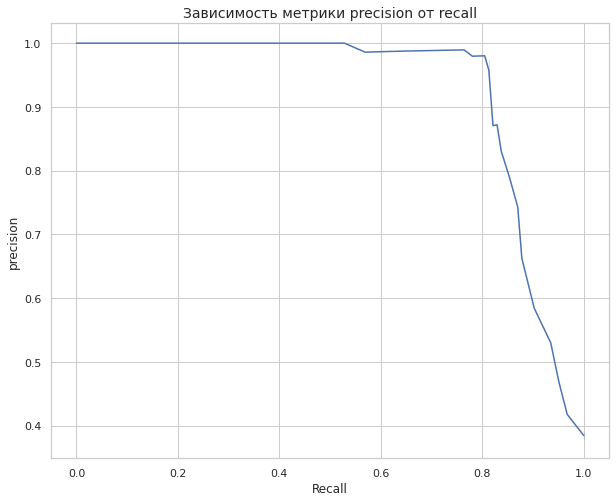

In [49]:
# построим график Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred2[:,1])
plt.subplots(figsize=(10, 8))
sns.lineplot(x=recall, y=precision)
plt.ylabel('precision')
plt.xlabel('Recall')
plt.title(f'Зависимость метрики precision от recall', fontsize=14)
plt.show()

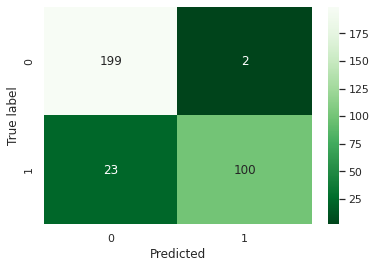

In [50]:
# построение матрицы ошибок
cm = confusion_matrix(y_test, y_test_pred1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

Ошибок первого рода всего 2, в то время как ошибок второго рода составляют чуть меньше трети от верно предсказанного снижения покупательской активности у пользователей.

## Анализ важности признаков
Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP. Сделаем выводы о значимости признаков.

In [51]:
best_preprocessor = best_model['preprocessor']
X_train_p = best_preprocessor.transform(X_train)
X_test_p = best_preprocessor.transform(X_test)

ohe_p_columns = best_preprocessor['ohe'].get_feature_names_out(input_features=ohe_columns).tolist()
columns = ohe_p_columns + ord_columns + num_columns
# получим датафрейм с признаками
X_train_pd = pd.DataFrame(X_train_p, columns=columns)
X_test_pd = pd.DataFrame(X_test_p, columns=columns)

# выделим часть выборки
X_train_s = shap.sample(X_train_pd, 50, random_state=RANDOM_STATE)
X_test_s = shap.sample(X_test_pd, 50, random_state=RANDOM_STATE)

In [52]:
import sklearn
sklearn.__version__

'1.5.2'

  0%|          | 0/50 [00:00<?, ?it/s]

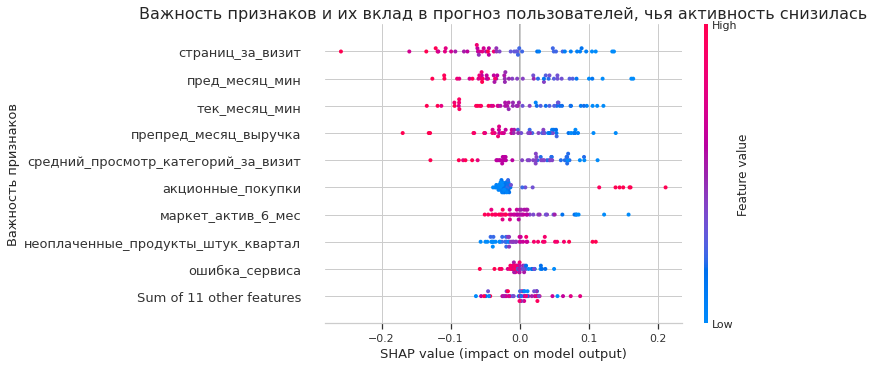

In [53]:
explainer = shap.KernelExplainer(best_model['models'].predict_proba, X_train_s)
shap_values = explainer(X_test_s)

plt.title('Важность признаков и их вклад в прогноз пользователей, чья активность снизилась', fontsize=16)
plt.ylabel('Важность признаков', fontsize=13)
shap.plots.beeswarm(shap_values[:,:,1])
plt.show()

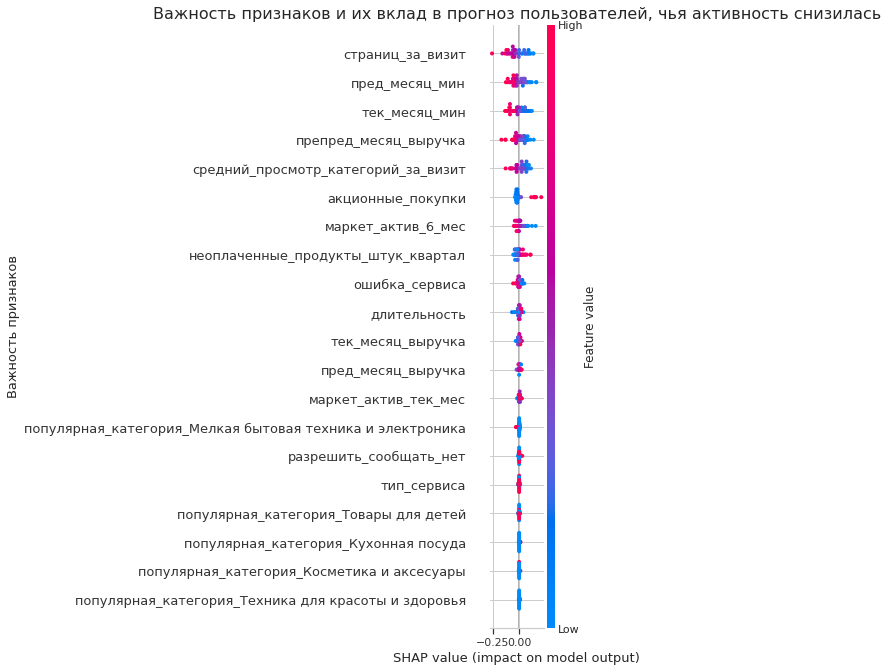

In [54]:
plt.title('Важность признаков и их вклад в прогноз пользователей, чья активность снизилась', fontsize=16)
plt.ylabel('Важность признаков', fontsize=13)
shap.summary_plot(shap_values[:,:,1], X_test_s)
plt.show()

**Вывод:**
- самые важные признаки, которые сильнее всего влияют на целевой признак, это кол-во просмотренных пользователем страниц за визит, среднее кол-во просмотренных категорий за визит, количество минут проведенных на сайте за текущий месяц и предыдущий месяц, акционные покупки и тд.
- высокое значение этих параметров говорит о том, что при прогнозировании они скорее будут отнесены к минорному классу (покупательская активность останётся на прежнем уровне)
- однако, ситуация для признаков акционных покупок и общим числом неоплаченных товаров в корзине за последние 3 месяца у пользователя наоборот говорит о том, что при их высоких значениях модель скорее спрогнозируем снижение покупательской активности.
- незначительным признаком является резрешение сообщать информацию о дополнительных предложениях;
- на основе этого можно больше предлагать пользователям возможные интересные товары, для увеличения количества посещаемых страниц, а также предлагать им более разнообразные категории товаров к просмотру.

## Сегментация покупателей
Выполним сегментацию покупателей. Используем результаты моделирования и данные о прибыльности покупателей.

In [55]:
# объединим с датафреймом, в котором содержится информация о прибыли
df_profit = pd.concat([data_all, id_col], axis=1)
df_profit.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,пред_месяц_мин,тек_месяц_мин,пред_месяц_выручка,препред_месяц_выручка,тек_месяц_выручка,id
0,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,12,10,5216.0,4472.0,4971.600098,215349
1,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,8,13,5457.5,4826.0,5058.399902,215350
2,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,11,13,6158.0,4793.0,6610.399902,215351
3,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,8,11,5807.5,4594.0,5872.500000,215352
4,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,10,10,4738.5,5124.0,5388.500000,215353


In [56]:
# объединим с датафреймом, в котором содержится информация о прибыли
df_profit = df_profit.merge(money, on='id', how='left')
df_profit.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,пред_месяц_мин,тек_месяц_мин,пред_месяц_выручка,препред_месяц_выручка,тек_месяц_выручка,id,прибыль
0,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,12,10,5216.0,4472.0,4971.600098,215349,4.16
1,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,8,13,5457.5,4826.0,5058.399902,215350,3.13
2,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,11,13,6158.0,4793.0,6610.399902,215351,4.87
3,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,8,11,5807.5,4594.0,5872.500000,215352,4.21
4,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,10,10,4738.5,5124.0,5388.500000,215353,3.95


In [57]:
# применим модель ко всем данным и найдем вероятность снижения покупательской активности
df_profit['вероятность_снижения'] = best_model.predict_proba(df_profit)[:, 1]
df_profit.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,пред_месяц_мин,тек_месяц_мин,пред_месяц_выручка,препред_месяц_выручка,тек_месяц_выручка,id,прибыль,вероятность_снижения
0,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,12,10,5216.0,4472.0,4971.600098,215349,4.16,0.931034
1,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,8,13,5457.5,4826.0,5058.399902,215350,3.13,0.448276
2,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,11,13,6158.0,4793.0,6610.399902,215351,4.87,0.758621
3,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,8,11,5807.5,4594.0,5872.500000,215352,4.21,0.931034
4,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,10,10,4738.5,5124.0,5388.500000,215353,3.95,0.689655


Выделим сегмент с высокой вероятностью снижения покупательской активности и высокой прибылью. Проведём графическое и аналитическое исследование данных групп покупателей.

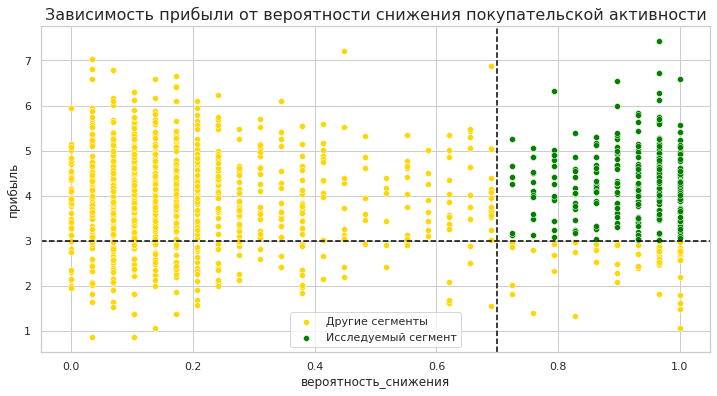

In [58]:
# выделим сегмент с высокой вероятностью снижения покупательской активности и высокой прибылью
segment = df_profit.query('прибыль > 3 and вероятность_снижения > 0.7')
#
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_profit, x='вероятность_снижения', y='прибыль', 
                label='Другие сегменты', color='gold')
sns.scatterplot(data=segment, x='вероятность_снижения', y='прибыль', 
                label='Исследуемый сегмент', color='green')
plt.legend()
plt.axvline(x=0.7, color='black', linestyle='--')
plt.axhline(y=3, color='black', linestyle='--')
plt.title('Зависимость прибыли от вероятности снижения покупательской активности', fontsize=16)
plt.show()

Выберем группу покупателей с различным типом сервиса: стандарт и премиум. Проанализируем, что влияет  на покупательскую активность покупателей в каждой категории. Проведём графическое и аналитическое исследование данных групп покупателей.

**Исследование клиентов имеющих стандартный тип сервиса**

In [59]:
# выделим пользователей с типом сервиса стандарт
segment_st = segment.query('тип_сервиса == "стандарт"')
data_st = df_profit.query('тип_сервиса == "стандарт" and прибыль > 3')

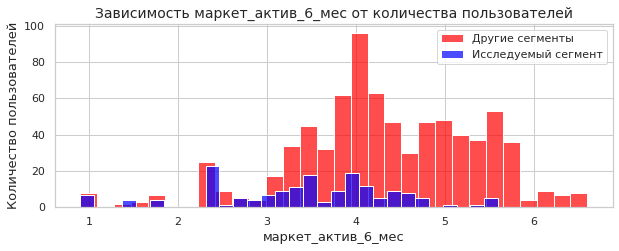

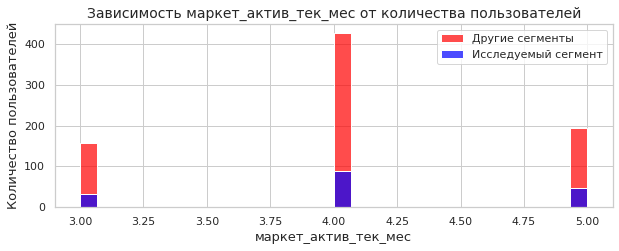

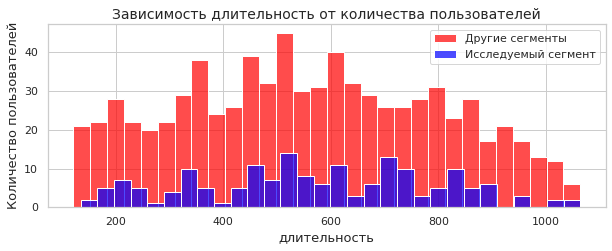

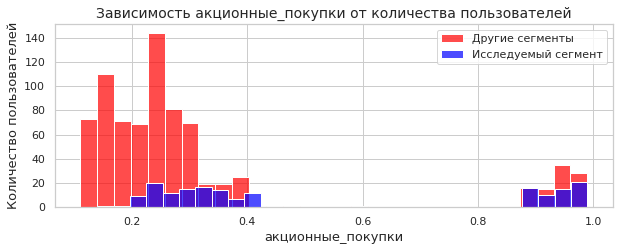

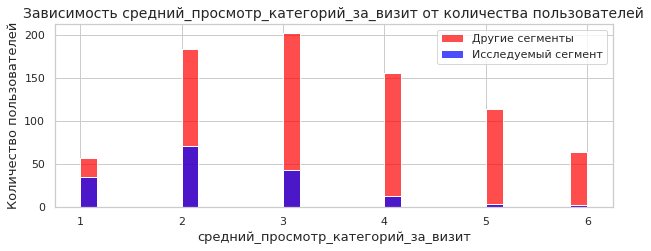

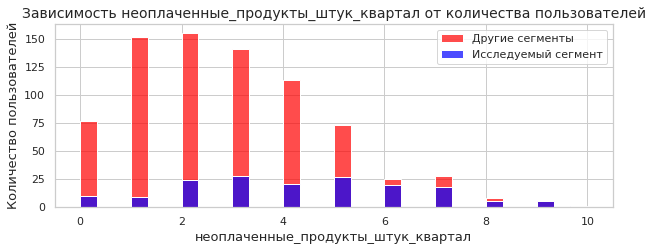

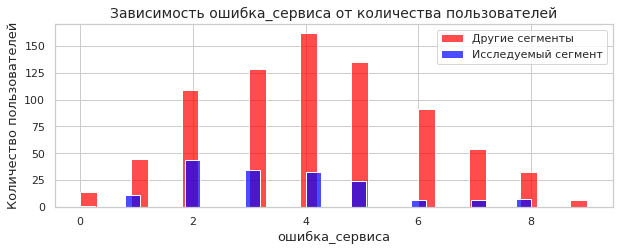

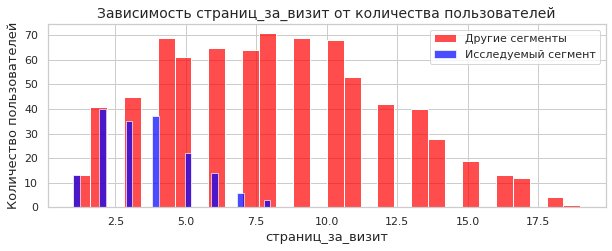

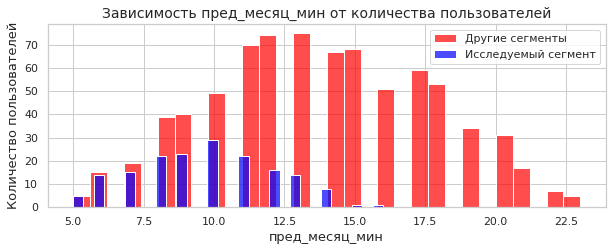

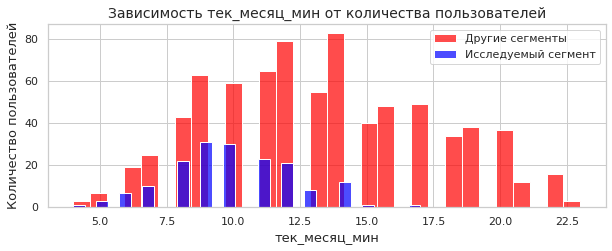

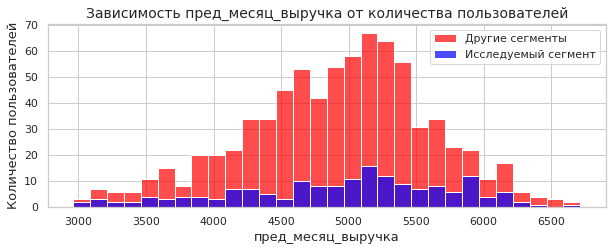

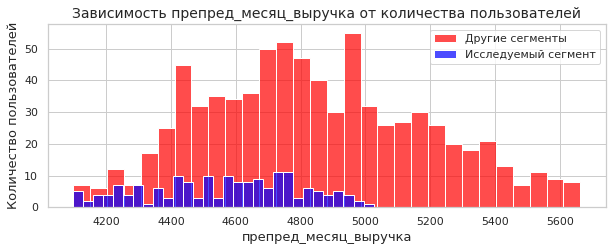

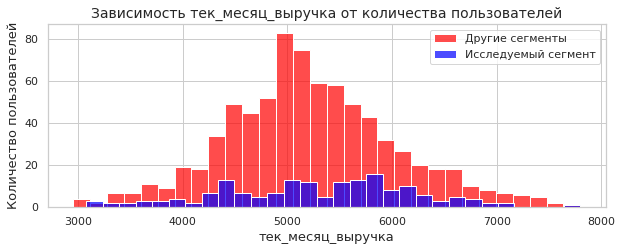

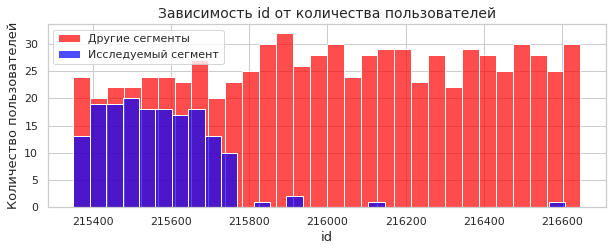

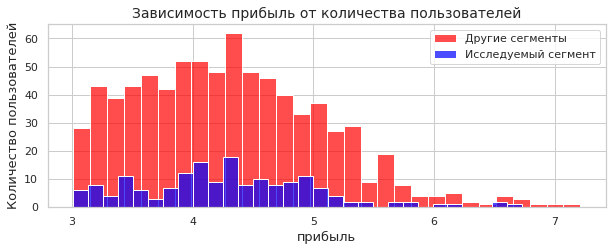

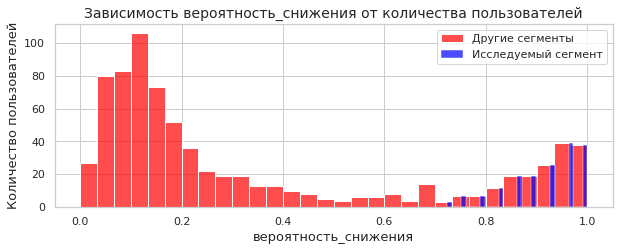

In [60]:
num_columns = data_st.select_dtypes(include='number').columns.tolist()
k = len(num_columns)
count = 1
for col in num_columns:
    plt.subplots(figsize=(10, k*4))
    plt.subplot(k, 1, count)
    sns.histplot(x=col, data=data_st, bins = 30, color='red', 
                 alpha=0.7, label='Другие сегменты');
    sns.histplot(x=col, data=segment_st, bins = 30, color='blue', 
                 alpha=0.7, label='Исследуемый сегмент');
    plt.legend()
    plt.xlabel(f'{col}', fontsize=13)
    plt.ylabel('Количество пользователей', fontsize=13)
    plt.title(f'Зависимость {col} от количества пользователей', fontsize=14)
    plt.show()
    count += 1

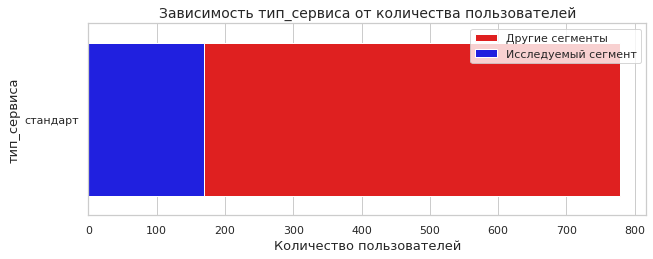

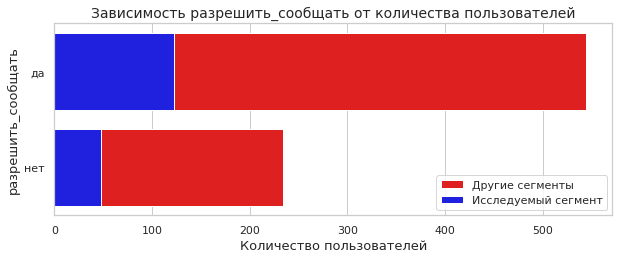

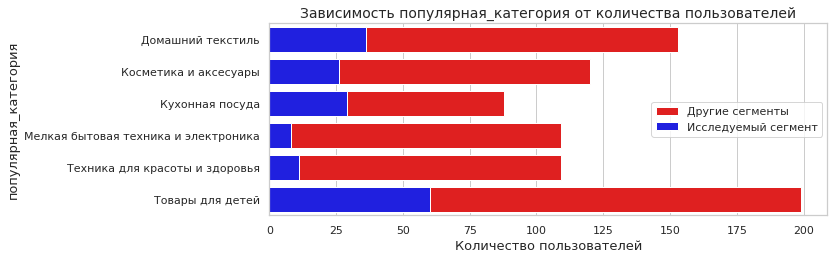

In [61]:
cat_columns = data_st.select_dtypes(exclude='number').columns.tolist()[1:]
k = len(cat_columns)
count = 1
for col in cat_columns:
    plt.subplots(figsize=(10, k*4))
    plt.subplot(k, 1, count)
    df1 = data_st.pivot_table(index=col, values='длительность', aggfunc='count').reset_index()
    sns.barplot(data=df1, y=col, x='длительность', color='red', label='Другие сегменты')
    df2 = segment_st.pivot_table(index=col, values='длительность', aggfunc='count').reset_index()
    sns.barplot(data=df2, y=col, x='длительность', color='blue', label='Исследуемый сегмент')
    plt.legend()
    plt.ylabel(f'{col}', fontsize=13)
    plt.xlabel('Количество пользователей', fontsize=13)
    plt.title(f'Зависимость {col} от количества пользователей', fontsize=14)
    plt.show()
    count += 1

Для пользователей с типом сервиса "стандарт" можно заметить следующее:
- среднемесячная значение маркетинговых коммуникаций компании (кол-во рассылок, звонков, присылаемой рекламы и тд) с пользователями из исследуемого сегмента ниже чем у остальных пользователей. Следовательно можно предложить компании увеличить в отношении них маркетинговую активность для предотвращения снижения покупательской активности пользователей.
- среднее количество категорий товаров просмотренных пользователем за визит ниже в исследуемом сегменте пользователей чем у остальных пользователей. Можно рекомендовать пользователям товары из более широкого списка категорий.
- пользователи исследуемого сегмента посещают меньшее кол-во страниц, проводят меньше времени на сайте (менее 15 минут) как в предыдущем так и в тякущем месяце, чем остальные пользователи.
- меньше всего пользователи из исследуемого сегмента покупают мелкую бытовую технику, электронику и технику для красоты и здоровья.
- самая популярная категория товаров среди пользователей как исследуемого сегмента, так и среди всех пользователей - это товары для детей.

**Исследование клиентов имеющих премиальный тип сервиса**

In [62]:
# выделим пользователей с типом сервиса стандарт
segment_pr = segment.query('тип_сервиса == "премиум"')
data_pr = df_profit.query('тип_сервиса == "премиум" and прибыль > 3')

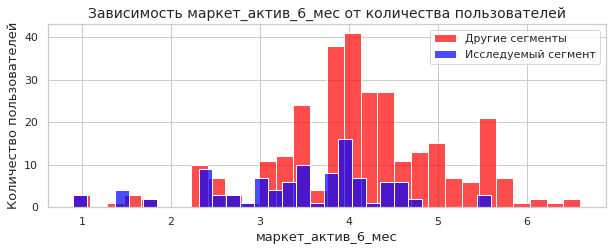

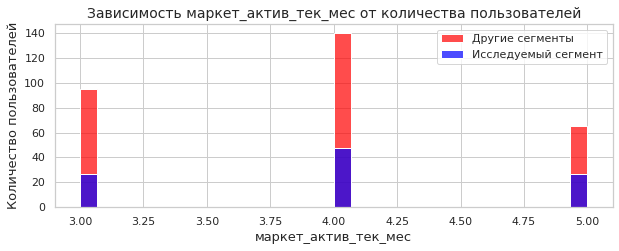

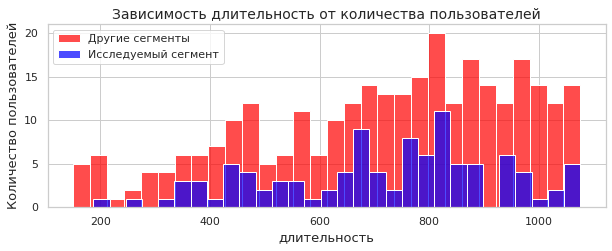

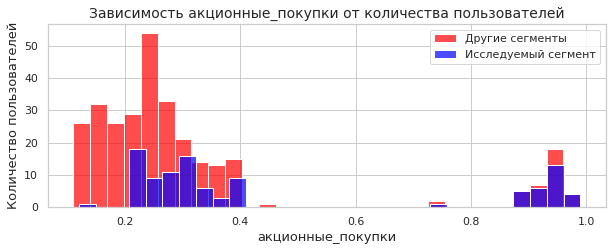

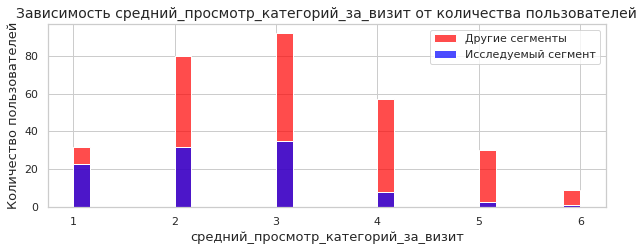

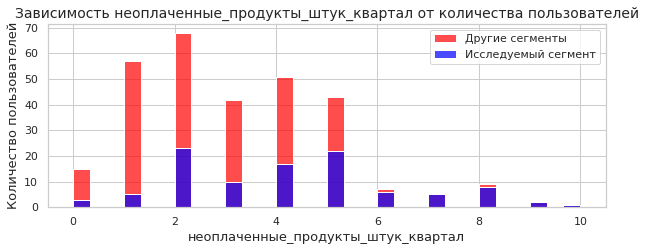

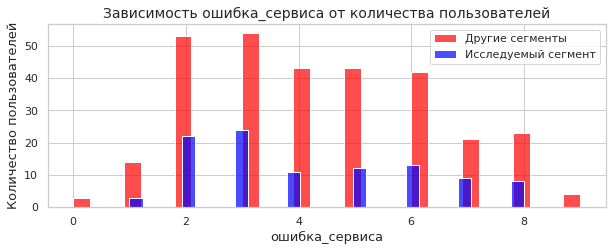

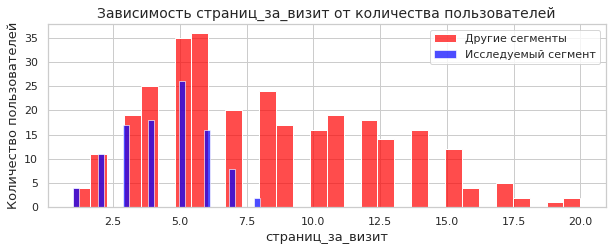

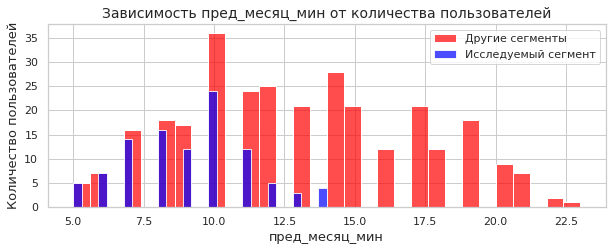

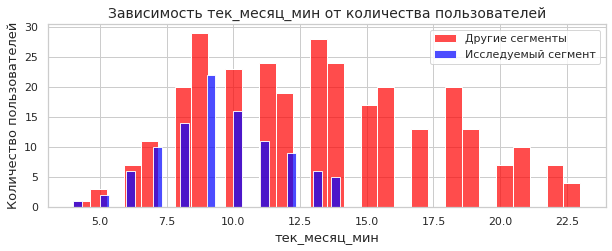

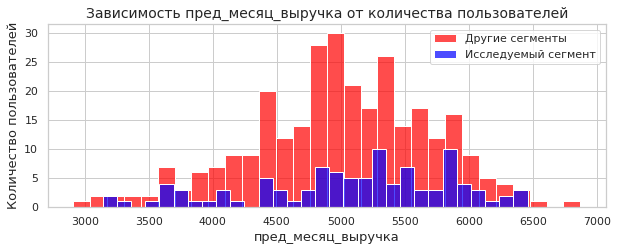

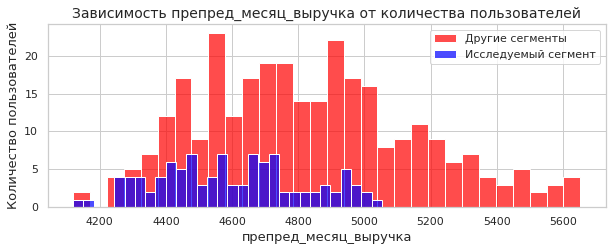

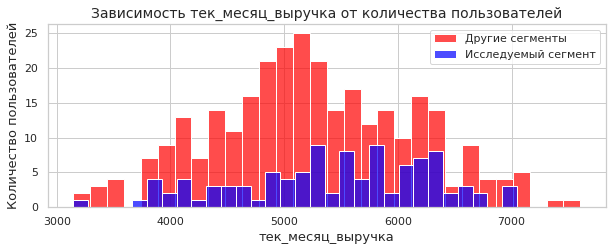

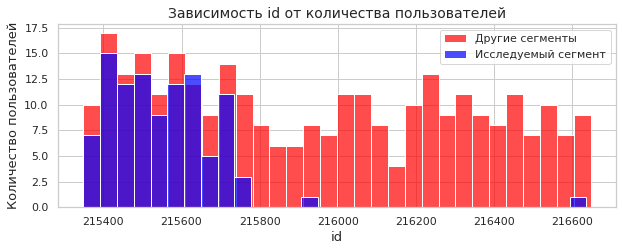

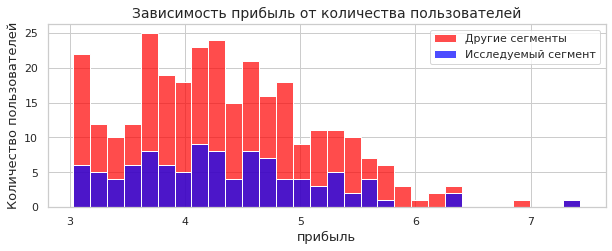

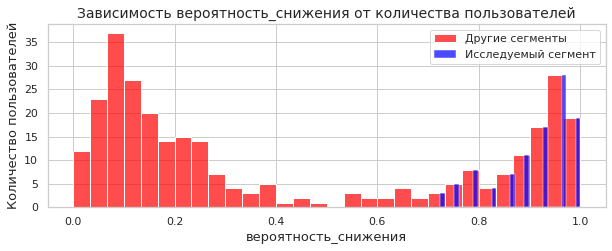

In [63]:
num_columns = data_pr.select_dtypes(include='number').columns.tolist()
k = len(num_columns)
count = 1
for col in num_columns:
    plt.subplots(figsize=(10, k*4))
    plt.subplot(k, 1, count)
    sns.histplot(x=col, data=data_pr, bins = 30, color='red', 
                 alpha=0.7, label='Другие сегменты');
    sns.histplot(x=col, data=segment_pr, bins = 30, color='blue', 
                 alpha=0.7, label='Исследуемый сегмент');
    plt.legend()
    plt.xlabel(f'{col}', fontsize=13)
    plt.ylabel('Количество пользователей', fontsize=13)
    plt.title(f'Зависимость {col} от количества пользователей', fontsize=14)
    plt.show()
    count += 1

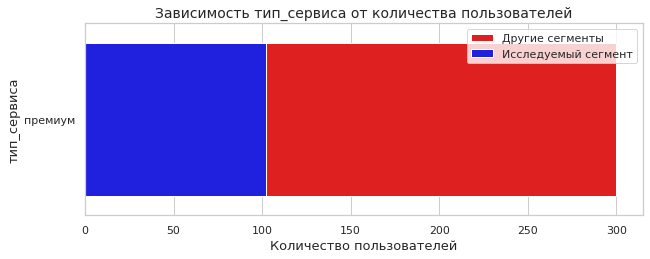

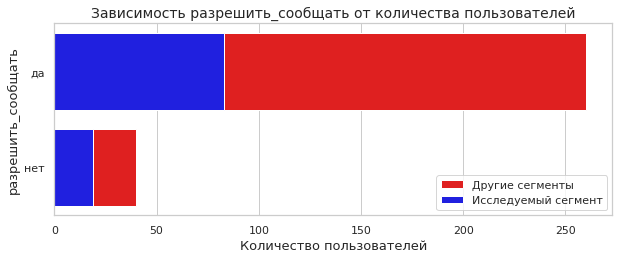

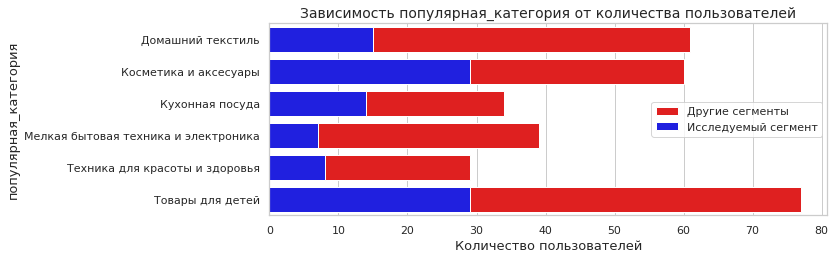

In [64]:
cat_columns = data_pr.select_dtypes(exclude='number').columns.tolist()[1:]
k = len(cat_columns)
count = 1
for col in cat_columns:
    plt.subplots(figsize=(10, k*4))
    plt.subplot(k, 1, count)
    df1 = data_pr.pivot_table(index=col, values='длительность', aggfunc='count').reset_index()
    sns.barplot(data=df1, y=col, x='длительность', color='red', label='Другие сегменты')
    df2 = segment_pr.pivot_table(index=col, values='длительность', aggfunc='count').reset_index()
    sns.barplot(data=df2, y=col, x='длительность', color='blue', label='Исследуемый сегмент')
    plt.legend()
    plt.ylabel(f'{col}', fontsize=13)
    plt.xlabel('Количество пользователей', fontsize=13)
    plt.title(f'Зависимость {col} от количества пользователей', fontsize=14)
    plt.show()
    count += 1

Для пользователей с типом сервиса "премиум" можно заметить следующее:
- среднемесячная значение маркетинговых коммуникаций компании (кол-во рассылок, звонков, присылаемой рекламы и тд) с пользователями из исследуемого сегмента ниже чем у остальных пользователей. Следовательно можно предложить компании увеличить в отношении них маркетинговую активность для предотвращения снижения покупательской активности пользователей.
- среднее количество категорий товаров просмотренных пользователем за визит ниже в исследуемом сегменте пользователей чем у остальных пользователей. Можно рекомендовать пользователям товары из более широкого списка категорий.
- количество неоплаченных товаров в корзине у пользователей из интересующего сегмента принимает достаточно большое значение по сравнению с остальными пользователями.
- пользователи исследуемого сегмента посещают меньшее кол-во страниц, проводят меньше времени на сайте (менее 15 минут) как в предыдущем так и в тякущем месяце, чем остальные пользователи.
- также можно отметить более низкие значения выручки за препредыдущий месяц по сравнению с остальными пользователями.
- меньше всего пользователи из исследуемого сегмента покупают мелкую бытовую технику, электронику и технику для красоты и здоровья.
- самыми популярными категориями товаров среди пользователей исследуемого сегмента являются товары для детей, а также косметика и аксесуары, что пересекается с остальными пользователями, однако, им еще свойственно покупать домашний текстиль.

**Вывод:** был взят сегмент пользователей с высоким уговнем прибыли (>3) и большим значением вероятности снижения покупательской активности (>0.7). Для исследуемого сегмента были отобраны пользователи с разным типом сервиса: стандарт и премиум. Можно предположить, что пользователи с разным типом сервиса имеют разное продуктовое поведение.

Для пользователей со стандартным типом сервиса характерно:
- среднемесячная значение маркетинговых коммуникаций компании (кол-во рассылок, звонков, присылаемой рекламы и тд) с пользователями из исследуемого сегмента ниже чем у остальных пользователей.
- среднее количество категорий товаров просмотренных пользователем за визит ниже в исследуемом сегменте пользователей чем у остальных пользователей.
- пользователи исследуемого сегмента посещают меньшее кол-во страниц, проводят меньше времени на сайте (менее 15 минут) как в предыдущем так и в тякущем месяце, чем остальные пользователи.
- меньше всего пользователи из исследуемого сегмента покупают мелкую бытовую технику, электронику и технику для красоты и здоровья.
- самая популярная категория товаров среди пользователей как исследуемого сегмента, так и среди всех пользователей - это товары для детей.

Для пользователей с премиальным типом сервиса характерно:
- среднемесячная значение маркетинговых коммуникаций компании (кол-во рассылок, звонков, присылаемой рекламы и тд) с пользователями из исследуемого сегмента ниже чем у остальных пользователей.
- среднее количество категорий товаров просмотренных пользователем за визит ниже в исследуемом сегменте пользователей чем у остальных пользователей.
- количество неоплаченных товаров в корзине у пользователей из интересующего сегмента принимает достаточно большое значение по сравнению с остальными пользователями.
- пользователи исследуемого сегмента посещают меньшее кол-во страниц, проводят меньше времени на сайте (менее 15 минут) как в предыдущем так и в тякущем месяце, чем остальные пользователи.
- также можно отметить более низкие значения выручки за препредыдущий месяц по сравнению с остальными пользователями.
- меньше всего пользователи из исследуемого сегмента покупают мелкую бытовую технику, электронику и технику для красоты и здоровья.
- самыми популярными категориями товаров среди пользователей исследуемого сегмента являются товары для детей, а также косметика и аксесуары, что пересекается с остальными пользователями, однако, им еще свойственно покупать домашний текстиль.

Общие рекомендации:
- как для пользователей с типом сервиса стандарт, так и премиум в исследовательском сегменте характерно снижение значений маркетинговых коммуникаций компании с пользователем. Следовательно можно предложить компании увеличить в отношении них маркетинговую активность для предотвращения снижения покупательской активности пользователей.
- как для пользователей с типом сервиса стандарт, так и премиум в исследовательском сегменте характерно посещение меньшего количества категорий товаров за визит. Можно рекомендовать пользователям товары из более широкого списка категорий.
- пользователям из премиального сервиса можно рекомендовать предоставление скидки на товары находящиеся в корзине покупателя.
- как для пользователей с типом сервиса стандарт, так и премиум в исследовательском сегменте нехарактерна покупка мелкой быловой техники, электроники и техники для красоты и здоровья.
- самые популярные категории товаров у пользователей со стандартным типом сервиса и премиальным типом сервиса частично совпадают - это товары для детей. Однако для премиальных пользователей также характерна покупка косметики и аксесуаров.

## Общий вывод
Сделайте общий вывод:
опишите задачу;
опишите исходные данные и проведённую предобработку;
напишите, что вы сделали для поиска лучшей модели;
укажите лучшую модель;
добавьте выводы и дополнительные предложения для выбранного сегмента покупателей.

1. В исследовании интернет-магазина «В один клик», продающего разные товары, были изучены данные представленные в четырёх файлах csv, которые содержали данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении, данные о выручке, которую получает магазин с покупателя, данные о времени (в минутах), которое покупатель провёл на сайте в течение периода, а также данные о среднемесячной прибыли покупателя за последние 3 месяца.

2. Была проведена предобработка полученных данных в датафреймах. Были изменены наименования столбцов. Пропусков и явных дубликатов обнаружено не было. Были исследованы и устранены неявные дубликаты.

3. на основе проведенного исследовательского анализа данных из интернет-магазина были изучены различные характеристики, по которым получены следующие выводы:
* Целевой признак: 
    - у примерно 60% пользователей покупательская активность осталась на прежнем уровне. И у около 40% пользователей покупательская активность снизилась.
* Исследование коммуникации сотрудников компании с клиентом:
    - 71% пользователей имеют стандартный тип сервиса. 29% пользователей имеют премиальный тип сервиса.
    - 74% пользователей дают согласие на получение предложений о товарах, 26% пользователей отказываются.
    - количество дней с момента регистрации в среднем составляет 600 дней.
    - в среднем количество маркетинговых коммуникаций в текущем месяце, а также среднемесячное значение маркетинговых коммуникаций за последние 6 месяцев составляет 4 коммуникации (звонки, рассылки, реклама и тд)
* Исследование продуктового поведение покупателя: 
    - товары для детей составляют самую популярную категорию товаров и имеют долю 25% от общего числа товаров.
    - среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев составляет 0,3. Данные имеют выбросы, что говорит о том, что часть пользователей покупают в основном только акционные товары.
    - покупатели в среднем просматривают 3 категории товаров.
    - количество неоплаченных продуктов в корзинах покупателей за последние три месяцы в среднем составляет порядка 3х товаров.
* Исследование покупательского поведение клиента: 
    - данные представлены для всех трех периодов, когда зафиксирована выручка: за текущий, предыдущий и препредыдущий месяц, в равном количестве. Что вызывает сомнения в достоверности.
    - данные выручки имели выброс в сторону неправдоподобно большого значения. После его удаления данные имеют нормальное распределение.
    - данные прибыли также имеют нормальное распределение.
* Исследование поведение покупателя на сайте:
    - среднее число сбоев, которые касаются пользователя при посещении сайта, составляют 4. данные не содержат выбросов.
    - среднее число просмотренных страниц пользователем за визит составляет 8 страниц.
    - данные представлены за текущий и предыдущий месяц
    - в среднем время проведенное на сайте составляет 13 минут, данные не имеют выбросов.

4. Для дальнейшего исследования объединили исходные датафреймы в один. Так как данные о выручке и времени на сайте находятся в одном столбце для всех периодов, то выделили их в отдельные столбцы для каждого периода.

5. Для проверки на мультиколлинеарность количественных признаков посчитаны коэффициентом инфляции дисперсии (VIF). Так как все полученные значения ниже 5, то это указывает на умеренную корреляцию между параметрами. Поэтому мультиколлинеарность не является проблемой. Также были посчитаны коэффициенты корреляции Фи и построена матрица корреляции для всех признаков, в которых также не наблюдается проблемы мультиколлинеарности.

6. С целью обучения и нахождения лучшей модели МО использовали один общий пайплайн для всех моделей (огистическую регрессию, метод опорных векторов, метод k-ближайших соседей, дерево решений) и инструмент подбора гиперпараметров, который вернул нам лучшую модель. Лучшей моделью оказалась модель k ближайших соседей с количеством ближайших соседей 29.

7. Была проведена оценка важности признаков с помощью библиотека shap.
- самые важные признаки, которые сильнее всего влияют на целевой признак, это кол-во просмотренных пользователем страниц за визит, среднее кол-во просмотренных категорий за визит, количество минут проведенных на сайте за текущий месяц и предыдущий месяц, акционные покупки и тд.
- высокое значение этих параметров говорит о том, что при прогнозировании модель предскажет сохранение покупательской активности на прежнем уровне
- однако, ситуация для признаков акционных покупок и общим числом неоплаченных товаров в корзине за последние 3 месяца у пользователя наоборот говорит о том, что при их высоких значениях модель скорее спрогнозируем снижение покупательской активности.
- незначительным признаком является резрешение сообщать информацию о дополнительных предложениях;
- на основе этого можно больше предлагать пользователям возможные интересные товары, для увеличения количества посещаемых страниц, а также предлагать им более разнообразные категории товаров к просмотру.

8. В исследовании сегментации покупателей был взят сегмент пользователей с высоким уговнем прибыли и большим значением вероятности снижения покупательской активности. Для исследуемого сегмента были отобраны пользователи с разным типом сервиса: стандарт и премиум.

Для пользователей со стандартным типом сервиса характерно:
- среднемесячная значение маркетинговых коммуникаций компании (кол-во рассылок, звонков, присылаемой рекламы и тд) с пользователями из исследуемого сегмента ниже чем у остальных пользователей.
- среднее количество категорий товаров просмотренных пользователем за визит ниже в исследуемом сегменте пользователей чем у остальных пользователей.
- пользователи исследуемого сегмента посещают меньшее кол-во страниц, проводят меньше времени на сайте (менее 15 минут) как в предыдущем так и в тякущем месяце, чем остальные пользователи.
- меньше всего пользователи из исследуемого сегмента покупают мелкую бытовую технику, электронику и технику для красоты и здоровья.
- самая популярная категория товаров среди пользователей как исследуемого сегмента, так и среди всех пользователей - это товары для детей.

Для пользователей с премиальным типом сервиса характерно:
- среднемесячная значение маркетинговых коммуникаций компании (кол-во рассылок, звонков, присылаемой рекламы и тд) с пользователями из исследуемого сегмента ниже чем у остальных пользователей.
- среднее количество категорий товаров просмотренных пользователем за визит ниже в исследуемом сегменте пользователей чем у остальных пользователей.
- количество неоплаченных товаров в корзине у пользователей из интересующего сегмента принимает достаточно большое значение по сравнению с остальными пользователями.
- пользователи исследуемого сегмента посещают меньшее кол-во страниц, проводят меньше времени на сайте (менее 15 минут) как в предыдущем так и в тякущем месяце, чем остальные пользователи.
- также можно отметить более низкие значения выручки за препредыдущий месяц по сравнению с остальными пользователями.
- меньше всего пользователи из исследуемого сегмента покупают мелкую бытовую технику, электронику и технику для красоты и здоровья.
- самыми популярными категориями товаров среди пользователей исследуемого сегмента являются товары для детей, а также косметика и аксесуары, что пересекается с остальными пользователями, однако, им еще свойственно покупать домашний текстиль.

**Итоговый вывод:** Для улучшения покупательской активности пользователей сайта "В один клик", продающих разные товары можно рекомендовать следующее:
- увеличить в отношении пользователей, которые мало времени проводят на сайте, маркетинговую активность для предотвращения снижения покупательской активности пользователей.
- рекомендовать товары из более широкого списка категорий.
- пользователям из премиального сервиса можно рекомендовать предоставление скидки на товары находящиеся в корзине покупателя.
- проведение акции на товары из самых популярных категорий товаров (например, товары для детей).

Однако снижение покупательской активности может носить с сезонный характер связанный с праздниками или определенными категориями товаров, например, товары для школьников, которые относятся к товарам для детей. Следует более детально изучить категории товаров чтобы точнее сказать с чем связано снижение покупатульской активности пользователей.